#AI BootCamp Cohort02, 03 August, 2024
#Final Project
#Muhammad Haris, h4harris@gmail.com, +92-345-5015592
IDE # Google Colab (2024-06-18)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display


In [ ]:
# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')                           #mounting my google drive on colab

Mounted at /content/drive


In [197]:
!ls "/content/drive/My Drive/Classroom/watch8/"                 #checking directory under watch8 folder

export_Aug_2024.xml	 export_csv_Aug_2_2024.csv  export.zip	steps.csv
export_cda_May_2024.xml  export_May_2024.xml	    hr.csv	walk_run_s.csv


In [5]:
# create element tree object
tree = ET.parse('/content/drive/My Drive/Classroom/watch8/export_Aug_2024.xml')
# create element tree object tree = ET.parse('apple_health_HARIS_export/export.xml')
# create element tree object
tree = ET.parse('/content/drive/My Drive/Classroom/watch8/export_Aug_2024.xml')

 help taken from https://docs.python.org/3/library/xml.etree.elementtree.html

 help taken from IOS API documentation, support.apple.com , discussions.apple.com

In [6]:
# extract the attributes of health record
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]
record_list

[{'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Haris’s iPhone',
  'sourceVersion': '16.3.1',
  'unit': 'cm',
  'creationDate': '2023-03-10 23:50:30 +0500',
  'startDate': '2023-03-10 23:50:30 +0500',
  'endDate': '2023-03-10 23:50:30 +0500',
  'value': '167.64'},
 {'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Health',
  'sourceVersion': '10.3.1',
  'unit': 'cm',
  'creationDate': '2017-04-28 12:00:41 +0500',
  'startDate': '2017-04-28 12:00:41 +0500',
  'endDate': '2017-04-28 12:00:41 +0500',
  'value': '166'},
 {'type': 'HKQuantityTypeIdentifierBodyMass',
  'sourceName': 'Haris’s iPhone',
  'sourceVersion': '16.4.1',
  'unit': 'kg',
  'creationDate': '2023-05-26 10:59:57 +0500',
  'startDate': '2023-05-26 10:59:57 +0500',
  'endDate': '2023-05-26 10:59:57 +0500',
  'value': '73.9356'},
 {'type': 'HKQuantityTypeIdentifierBodyMass',
  'sourceName': 'Health',
  'sourceVersion': '10.3.1',
  'unit': 'kg',
  'creationDate': '2017-04-28 12:00:41 +0500',
  'startDa

In [7]:
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)
# print the information of record_data
print(record_data.info())
# show the record_data DataFrame
display(record_data)
# create a DataFrame from record_list record_data = pd.DataFrame(record_list) # print the information of record_data print(record_data.info()) # show the record_data DataFrame display(record_data)
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)

# print the information of record_data
print(record_data.info())

# show the record_data DataFrame
display(record_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB
None


type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB
None


type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]

In [8]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB


In [9]:
record_data.describe()         # basic EDA's

type           sourceName  \
count                                      1139266              1139266   
unique                                          41                    4   
top     HKQuantityTypeIdentifierActiveEnergyBurned  Haris’s Apple Watch   
freq                                        206891               758781   

       sourceVersion     unit               creationDate  \
count        1139266  1132508                    1139266   
unique           112       17                     365138   
top             10.4     kcal  2024-03-27 16:20:08 +0500   
freq          220374   325749                       1465   

                        startDate                    endDate    value  \
count                     1139266                    1139266  1139266   
unique                     614975                     617260   174895   
top     2024-06-04 18:10:00 +0500  2024-05-30 18:05:00 +0500    0.068   
freq                           12                         12    54343   

                                                   device  
count                                             1020675  
unique                                               3640  
top     <<HKDevice: 0x301e88050>, name:Apple Watch, ma...  
freq                                                 4938

In [10]:
record_data.isnull().sum()       # basic EDA's

type                  0
sourceName            0
sourceVersion         0
unit               6758
creationDate          0
startDate             0
endDate               0
value                 0
device           118591
dtype: int64

In [11]:
record_data.shape      # basic EDA's

(1139266, 9)

In [12]:
len(record_data.columns)     # basic EDA's

9

In [13]:
record_data.count()          # basic EDA's

type             1139266
sourceName       1139266
sourceVersion    1139266
unit             1132508
creationDate     1139266
startDate        1139266
endDate          1139266
value            1139266
device           1020675
dtype: int64

In [14]:
record_data.columns.shape          # basic EDA's

(9,)

In [15]:
record_data.describe               # basic EDA's

<bound method NDFrame.describe of                                                      type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]>

In [16]:
record_data.dtypes     ############################################################### conversion needed  !!!!!!!!!!!!!!!!!!!

type             object
sourceName       object
sourceVersion    object
unit             object
creationDate     object
startDate        object
endDate          object
value            object
device           object
dtype: object

In [17]:
# unique elements in 'type' column of record_data
record_data.type.unique()
# unique elements in 'type' column of record_data record_data.type.unique()
# unique elements in 'type' column of record_data
record_data.type.unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierOxygenSaturation',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDo

 exploring all UID's and will use activities type those are of my interest, few willreturn NaN because i never used those

In [18]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierHeight'].tail(1)

type sourceName sourceVersion unit  \
1  HKQuantityTypeIdentifierHeight     Health        10.3.1   cm   

                creationDate                  startDate  \
1  2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   

                     endDate value device  
1  2017-04-28 12:00:41 +0500   166    NaN

In [19]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRespiratoryRate'].tail(1)

type           sourceName  \
54854  HKQuantityTypeIdentifierRespiratoryRate  Haris’s Apple Watch   

      sourceVersion       unit               creationDate  \
54854          10.5  count/min  2024-07-31 20:39:55 +0500   

                       startDate                    endDate value  \
54854  2024-07-31 20:29:04 +0500  2024-07-31 20:29:04 +0500  17.5   

                                                  device  
54854  <<HKDevice: 0x301d263f0>, name:Apple Watch, ma...

In [20]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierBodyMass'].tail(1)

type sourceName sourceVersion unit  \
3  HKQuantityTypeIdentifierBodyMass     Health        10.3.1   kg   

                creationDate                  startDate  \
3  2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   

                     endDate value device  
3  2017-04-28 12:00:41 +0500    80    NaN

In [21]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierHeartRate'].tail(1)


type           sourceName sourceVersion  \
54404  HKQuantityTypeIdentifierHeartRate  Haris’s Apple Watch          10.5   

            unit               creationDate                  startDate  \
54404  count/min  2024-08-02 18:19:52 +0500  2024-08-02 18:19:48 +0500   

                         endDate value  \
54404  2024-08-02 18:19:48 +0500   125   

                                                  device  
54404  <<HKDevice: 0x301e7e5d0>, name:Apple Watch, ma...

In [22]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierOxygenSaturation'].tail(1)

type    sourceName sourceVersion  \
54463  HKQuantityTypeIdentifierOxygenSaturation  Blood Oxygen             1   

      unit               creationDate                  startDate  \
54463    %  2024-07-08 06:52:39 +0500  2024-07-08 06:52:39 +0500   

                         endDate value  \
54463  2024-07-08 06:52:39 +0500  0.96   

                                                  device  
54463  <<HKDevice: 0x301e7c730>, name:Apple Watch, ma...

In [23]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRespiratoryRate'].tail(1)

type           sourceName  \
54854  HKQuantityTypeIdentifierRespiratoryRate  Haris’s Apple Watch   

      sourceVersion       unit               creationDate  \
54854          10.5  count/min  2024-07-31 20:39:55 +0500   

                       startDate                    endDate value  \
54854  2024-07-31 20:29:04 +0500  2024-07-31 20:29:04 +0500  17.5   

                                                  device  
54854  <<HKDevice: 0x301d263f0>, name:Apple Watch, ma...

In [24]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierStepCount'].tail(1)

type           sourceName sourceVersion  \
213249  HKQuantityTypeIdentifierStepCount  Haris’s Apple Watch          10.5   

         unit               creationDate                  startDate  \
213249  count  2024-08-02 22:22:52 +0500  2024-08-02 22:06:35 +0500   

                          endDate value  \
213249  2024-08-02 22:10:28 +0500    34   

                                                   device  
213249  <<HKDevice: 0x301e242d0>, name:Apple Watch, ma...

In [25]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierDistanceWalkingRunning'].tail(1)

type           sourceName  \
388878  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
388878          10.5   km  2024-08-02 22:22:52 +0500   

                        startDate                    endDate      value  \
388878  2024-08-02 22:06:35 +0500  2024-08-02 22:10:28 +0500  0.0231958   

                                                   device  
388878  <<HKDevice: 0x301d95360>, name:Apple Watch, ma...

In [26]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierBasalEnergyBurned'].tail(1)

type           sourceName  \
507736  HKQuantityTypeIdentifierBasalEnergyBurned  Haris’s Apple Watch   

       sourceVersion  unit               creationDate  \
507736          10.5  kcal  2024-08-02 22:45:01 +0500   

                        startDate                    endDate  value  \
507736  2024-08-02 22:30:00 +0500  2024-08-02 22:44:50 +0500  20.48   

                                                   device  
507736  <<HKDevice: 0x301e251d0>, name:Apple Watch, ma...

In [27]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierActiveEnergyBurned'].tail(1)

type           sourceName  \
714627  HKQuantityTypeIdentifierActiveEnergyBurned  Haris’s Apple Watch   

       sourceVersion  unit               creationDate  \
714627          10.5  kcal  2024-08-02 22:53:55 +0500   

                        startDate                    endDate  value  \
714627  2024-08-02 22:43:49 +0500  2024-08-02 22:53:53 +0500  8.465   

                                                   device  
714627  <<HKDevice: 0x301e64dc0>, name:Apple Watch, ma...

In [28]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierFlightsClimbed'].tail(1)

type           sourceName  \
721631  HKQuantityTypeIdentifierFlightsClimbed  Haris’s Apple Watch   

       sourceVersion   unit               creationDate  \
721631          10.5  count  2024-08-02 19:24:11 +0500   

                        startDate                    endDate value  \
721631  2024-08-02 19:12:48 +0500  2024-08-02 19:13:14 +0500     4   

                                                   device  
721631  <<HKDevice: 0x301d87610>, name:Apple Watch, ma...

In [29]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierAppleExerciseTime'].tail(1)

type           sourceName  \
740607  HKQuantityTypeIdentifierAppleExerciseTime  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
740607          10.5  min  2024-08-02 19:20:50 +0500   

                        startDate                    endDate value  \
740607  2024-08-02 19:19:00 +0500  2024-08-02 19:20:00 +0500     1   

                                                   device  
740607  <<HKDevice: 0x301e695e0>, name:Apple Watch, ma...

In [30]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRestingHeartRate'].tail(1)

type           sourceName  \
740663  HKQuantityTypeIdentifierRestingHeartRate  Haris’s Apple Watch   

       sourceVersion       unit               creationDate  \
740663          10.5  count/min  2024-07-01 07:34:35 +0500   

                        startDate                    endDate value device  
740663  2024-06-30 05:10:54 +0500  2024-06-30 21:46:48 +0500    53    NaN

In [31]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierVO2Max'].tail(1)

type           sourceName   sourceVersion  \
740942  HKQuantityTypeIdentifierVO2Max  Haris’s Apple Watch  2890.16.16.1.1   

             unit               creationDate                  startDate  \
740942  mL/min·kg  2024-08-02 18:16:34 +0500  2024-08-02 18:16:33 +0500   

                          endDate  value device  
740942  2024-08-02 18:16:33 +0500  41.89    NaN

In [32]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierWalkingHeartRateAverage'].tail(1)

type           sourceName  \
741081  HKQuantityTypeIdentifierWalkingHeartRateAverage  Haris’s Apple Watch   

       sourceVersion       unit               creationDate  \
741081          10.5  count/min  2024-07-22 07:09:12 +0500   

                        startDate                    endDate value device  
741081  2024-07-21 17:57:37 +0500  2024-07-21 19:19:37 +0500   109    NaN

In [33]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierEnvironmentalAudioExposure'].tail(1)

type  \
741906  HKQuantityTypeIdentifierEnvironmentalAudioExpo...   

                 sourceName sourceVersion    unit               creationDate  \
741906  Haris’s Apple Watch          10.5  dBASPL  2024-08-01 18:55:00 +0500   

                        startDate                    endDate    value  \
741906  2024-08-01 18:44:55 +0500  2024-08-01 18:58:30 +0500  62.9437   

                                                   device  
741906  <<HKDevice: 0x301e75c20>, name:Apple Watch, ma...

In [34]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierHeadphoneAudioExposure'].tail(1)

type      sourceName  \
760033  HKQuantityTypeIdentifierHeadphoneAudioExposure  Haris’s iPhone   

       sourceVersion    unit               creationDate  \
760033          17.6  dBASPL  2024-08-02 18:46:05 +0500   

                        startDate                    endDate   value  \
760033  2024-08-02 18:34:35 +0500  2024-08-02 18:34:38 +0500  60.578   

                                                   device  
760033  <<HKDevice: 0x301e66080>, name:oraimo Necklace...

In [35]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierWalkingDoubleSupportPercentage'].tail(1)

type      sourceName  \
799224  HKQuantityTypeIdentifierWalkingDoubleSupportPe...  Haris’s iPhone   

       sourceVersion unit               creationDate  \
799224          17.6    %  2024-08-03 00:03:03 +0500   

                        startDate                    endDate  value  \
799224  2024-08-02 20:11:15 +0500  2024-08-02 20:11:19 +0500  0.313   

                                                   device  
799224  <<HKDevice: 0x301e8d270>, name:iPhone, manufac...

In [36]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierSixMinuteWalkTestDistance'].tail(1)

type      sourceName  \
799279  HKQuantityTypeIdentifierSixMinuteWalkTestDistance  Haris’s iPhone   

       sourceVersion unit               creationDate  \
799279    2890.16.23    m  2024-08-01 19:19:58 +0500   

                        startDate                    endDate value device  
799279  2024-08-01 19:19:57 +0500  2024-08-01 19:19:57 +0500   500    NaN

In [37]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierAppleStandTime'].tail(1)

type           sourceName  \
819100  HKQuantityTypeIdentifierAppleStandTime  Haris’s Apple Watch   

         sourceVersion unit               creationDate  \
819100  2890.16.16.1.1  min  2024-08-02 20:35:22 +0500   

                        startDate                    endDate value device  
819100  2024-08-02 20:30:00 +0500  2024-08-02 20:35:00 +0500     1    NaN

In [38]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierWalkingSpeed'].tail(1)

type      sourceName sourceVersion  \
862370  HKQuantityTypeIdentifierWalkingSpeed  Haris’s iPhone          17.6   

         unit               creationDate                  startDate  \
862370  km/hr  2024-08-03 00:03:03 +0500  2024-08-02 20:11:15 +0500   

                          endDate  value  \
862370  2024-08-02 20:11:19 +0500  3.528   

                                                   device  
862370  <<HKDevice: 0x301e9e440>, name:iPhone, manufac...

In [39]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierWalkingStepLength'].tail(1)

type      sourceName  \
905637  HKQuantityTypeIdentifierWalkingStepLength  Haris’s iPhone   

       sourceVersion unit               creationDate  \
905637          17.6   cm  2024-08-03 00:03:03 +0500   

                        startDate                    endDate value  \
905637  2024-08-02 20:11:15 +0500  2024-08-02 20:11:19 +0500    57   

                                                   device  
905637  <<HKDevice: 0x301e6f6b0>, name:iPhone, manufac...

In [40]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierWalkingAsymmetryPercentage'].tail(1)

type      sourceName  \
925179  HKQuantityTypeIdentifierWalkingAsymmetryPercen...  Haris’s iPhone   

       sourceVersion unit               creationDate  \
925179          17.6    %  2024-08-03 00:03:03 +0500   

                        startDate                    endDate value  \
925179  2024-08-02 19:19:07 +0500  2024-08-02 19:19:48 +0500     0   

                                                   device  
925179  <<HKDevice: 0x301e42800>, name:iPhone, manufac...

In [41]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierStairAscentSpeed'].tail(1)

type           sourceName  \
926318  HKQuantityTypeIdentifierStairAscentSpeed  Haris’s Apple Watch   

         sourceVersion unit               creationDate  \
926318  2890.16.16.1.1  m/s  2024-08-02 13:43:47 +0500   

                        startDate                    endDate     value device  
926318  2024-08-02 13:43:17 +0500  2024-08-02 13:43:25 +0500  0.233095    NaN

In [42]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierStairDescentSpeed'].tail(1)

type           sourceName  \
927504  HKQuantityTypeIdentifierStairDescentSpeed  Haris’s Apple Watch   

         sourceVersion unit               creationDate  \
927504  2890.16.16.1.1  m/s  2024-08-02 18:25:24 +0500   

                        startDate                    endDate     value device  
927504  2024-08-02 18:24:20 +0500  2024-08-02 18:24:24 +0500  0.221807    NaN

In [43]:
record_data.loc[record_data['type']=='HKDataTypeSleepDurationGoal'].tail(1)  ###################################################################################

type sourceName sourceVersion unit  \
927505  HKDataTypeSleepDurationGoal     Health        16.4.1   hr   

                     creationDate                  startDate  \
927505  2023-05-26 23:09:43 +0500  2023-05-26 23:09:43 +0500   

                          endDate value device  
927505  2023-05-26 23:09:43 +0500     6    NaN

In [44]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierAppleWalkingSteadiness'].tail(1)

type      sourceName  \
927650  HKQuantityTypeIdentifierAppleWalkingSteadiness  Haris’s iPhone   

       sourceVersion unit               creationDate  \
927650    2890.16.23    %  2024-08-01 06:42:07 +0500   

                        startDate                    endDate     value  \
927650  2024-07-25 05:00:00 +0500  2024-08-01 05:00:00 +0500  0.916065   

                                                   device  
927650  <<HKDevice: 0x301e93ca0>, name:iPhone, manufac...

In [45]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRunningStrideLength'].tail(1)

type           sourceName  \
942673  HKQuantityTypeIdentifierRunningStrideLength  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
942673          10.5    m  2024-08-02 18:16:28 +0500   

                        startDate                    endDate value  \
942673  2024-08-02 18:16:18 +0500  2024-08-02 18:16:18 +0500  0.97   

                                                   device  
942673  <<HKDevice: 0x301e7c780>, name:Apple Watch, ma...

In [46]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRunningVerticalOscillation'].tail(1)

type  \
957721  HKQuantityTypeIdentifierRunningVerticalOscilla...   

                 sourceName sourceVersion unit               creationDate  \
957721  Haris’s Apple Watch          10.5   cm  2024-08-02 18:16:23 +0500   

                        startDate                    endDate value  \
957721  2024-08-02 18:16:10 +0500  2024-08-02 18:16:10 +0500   8.3   

                                                   device  
957721  <<HKDevice: 0x301e7eda0>, name:Apple Watch, ma...

In [47]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRunningGroundContactTime'].tail(1)

type           sourceName  \
972535  HKQuantityTypeIdentifierRunningGroundContactTime  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
972535          10.5   ms  2024-08-02 18:16:23 +0500   

                        startDate                    endDate value  \
972535  2024-08-02 18:16:15 +0500  2024-08-02 18:16:15 +0500   281   

                                                   device  
972535  <<HKDevice: 0x301e6c2d0>, name:Apple Watch, ma...

In [48]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierHeartRateRecoveryOneMinute'].tail(1) ###########################################################

type  \
972721  HKQuantityTypeIdentifierHeartRateRecoveryOneMi...   

                 sourceName   sourceVersion       unit  \
972721  Haris’s Apple Watch  2890.16.16.1.1  count/min   

                     creationDate                  startDate  \
972721  2024-08-02 18:19:43 +0500  2024-08-02 18:19:31 +0500   

                          endDate    value device  
972721  2024-08-02 18:19:31 +0500  30.4471    NaN

In [49]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRunningPower'].tail(1)

type           sourceName  \
1005871  HKQuantityTypeIdentifierRunningPower  Haris’s Apple Watch   

        sourceVersion unit               creationDate  \
1005871          10.5    W  2024-08-02 18:16:39 +0500   

                         startDate                    endDate value  \
1005871  2024-08-02 18:16:31 +0500  2024-08-02 18:16:31 +0500   226   

                                                    device  
1005871  <<HKDevice: 0x301e6c0f0>, name:Apple Watch, ma...

In [50]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierRunningSpeed'].tail(1)

type           sourceName  \
1038934  HKQuantityTypeIdentifierRunningSpeed  Haris’s Apple Watch   

        sourceVersion   unit               creationDate  \
1038934          10.5  km/hr  2024-08-02 18:16:31 +0500   

                         startDate                    endDate    value  \
1038934  2024-08-02 18:16:28 +0500  2024-08-02 18:16:28 +0500  10.9627   

                                                    device  
1038934  <<HKDevice: 0x301e6c820>, name:Apple Watch, ma...

In [51]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierTimeInDaylight'].tail(1)

type           sourceName  \
1038958  HKQuantityTypeIdentifierTimeInDaylight  Haris’s Apple Watch   

        sourceVersion unit               creationDate  \
1038958          10.5  min  2024-07-21 19:21:10 +0500   

                         startDate                    endDate value  \
1038958  2024-07-21 19:07:08 +0500  2024-07-21 19:12:08 +0500     1   

                                                    device  
1038958  <<HKDevice: 0x301e6c2d0>, name:Apple Watch, ma...

In [52]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierPhysicalEffort'].tail(1)

type           sourceName  \
1132459  HKQuantityTypeIdentifierPhysicalEffort  Haris’s Apple Watch   

          sourceVersion        unit               creationDate  \
1132459  2890.16.16.1.1  kcal/hr·kg  2024-08-02 22:53:58 +0500   

                         startDate                    endDate value device  
1132459  2024-08-02 22:53:32 +0500  2024-08-02 22:53:48 +0500   1.7    NaN

In [53]:
record_data.loc[record_data['type']=='HKCategoryTypeIdentifierSleepAnalysis'].tail(1)

type      sourceName sourceVersion  \
1134458  HKCategoryTypeIdentifierSleepAnalysis  Haris’s iPhone          17.6   

        unit               creationDate                  startDate  \
1134458  NaN  2024-08-02 05:45:00 +0500  2024-08-02 02:08:55 +0500   

                           endDate                              value device  
1134458  2024-08-02 05:45:00 +0500  HKCategoryValueSleepAnalysisInBed    NaN

In [54]:
record_data.loc[record_data['type']=='HKCategoryTypeIdentifierAppleStandHour'].tail(1)

type           sourceName  \
1139215  HKCategoryTypeIdentifierAppleStandHour  Haris’s Apple Watch   

        sourceVersion unit               creationDate  \
1139215          10.5  NaN  2024-08-02 22:50:41 +0500   

                         startDate                    endDate  \
1139215  2024-08-02 22:00:00 +0500  2024-08-02 23:00:00 +0500   

                                      value  \
1139215  HKCategoryValueAppleStandHourStood   

                                                    device  
1139215  <<HKDevice: 0x301eb0370>, name:Apple Watch, ma...

In [55]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierHeartRateVariabilitySDNN'].tail(1)

type  \
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion unit               creationDate  \
1139265  Haris’s Apple Watch          10.5   ms  2024-06-28 11:27:15 +0500   

                         startDate                    endDate    value  \
1139265  2024-06-28 11:26:14 +0500  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...

In [56]:
record_data # exploring raw df

type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]

from matplotlib import pyplot as plt
import seaborn as sns
record_data.groupby('sourceName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
record_data.loc[(record_data['type']=='HKQuantityTypeIdentifierHeartRate') & (record_data['value']=='192')] ############## this is when i got max HR warning during running,
# as per Dr's formula i.e
# 220 - age
# age in 2023 == 40,   220 -40 = 180 maxHR
# hr calc by watch = 192 while running

type           sourceName sourceVersion  \
1978  HKQuantityTypeIdentifierHeartRate  Haris’s Apple Watch         9.5.1   
7854  HKQuantityTypeIdentifierHeartRate  Haris’s Apple Watch         9.6.1   

           unit               creationDate                  startDate  \
1978  count/min  2023-07-22 17:34:11 +0500  2023-07-22 17:34:10 +0500   
7854  count/min  2023-08-31 17:36:38 +0500  2023-08-31 17:36:37 +0500   

                        endDate value  \
1978  2023-07-22 17:34:10 +0500   192   
7854  2023-08-31 17:36:37 +0500   192   

                                                 device  
1978  <<HKDevice: 0x301da14a0>, name:Apple Watch, ma...  
7854  <<HKDevice: 0x301dbfed0>, name:Apple Watch, ma...

converting datatypes, renaming columns

In [135]:
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns
# computational intense task !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)
# transform 'startDate' into date format
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')
# value is numeric, NaN if fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')
# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')
# reorder 'record_data' columns
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1) # transform 'startDate' into date format # record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d') record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A') record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d') record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B') # value is numeric, NaN if fails record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce') # shorter observation names record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '') record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '') # reorder 'record_data' columns record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)

# transform 'startDate' into date format
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')


# value is numeric, NaN  fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')

# reorder 'record_data' columns
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]

In [136]:
# unique elements in 'type' column of record_data
record_data['device']

In [137]:
""" # experimental

# return recorded Active Energy Burned
record_data.loc[(record_data['type'].str.contains("ActiveEnergyBurned"))]
# return recorded Active Energy Burned record_data.loc[(record_data['type'].str.contains("ActiveEnergyBurned"))]
# return recorded Active Energy Burned
record_data.loc[(record_data['type'].str.contains("ActiveEnergyBurned"))]

"""

' # experimental\n\n# return recorded Active Energy Burned\nrecord_data.loc[(record_data[\'type\'].str.contains("ActiveEnergyBurned"))]\n# return recorded Active Energy Burned record_data.loc[(record_data[\'type\'].str.contains("ActiveEnergyBurned"))]\n# return recorded Active Energy Burned\nrecord_data.loc[(record_data[\'type\'].str.contains("ActiveEnergyBurned"))]\n\n'

In [ ]:
#experimental
'''
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns
############################################################################################################################################################
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)
# transform 'startDate' into date format
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')
# value is numeric, NaN if fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')
# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')
# reorder 'record_data' columns
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1) # transform 'startDate' into date format # record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d') record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A') record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d') record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B') # value is numeric, NaN if fails record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce') # shorter observation names record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '') record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '') # reorder 'record_data' columns record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]
# remove 'sourceName', 'sourceVersion', 'device', 'creationDate', 'endDate' columns
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)

# transform 'startDate' into date format
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')


# value is numeric, NaN if fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')

# reorder 'record_data' columns
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]
'''

In [138]:
# dictionary of DataFrames for filtered 'record_data'
record_data_df_dict = {}
# filter 'type' of 'record_data'
record_types = [
'BodyMass',
'ActiveEnergyBurned',
'BasalEnergyBurned',
'DistanceWalkingRunning',
'StepCount',
'AppleStandTime',
'WalkingSpeed',
'RunningSpeed',
'HeartRateVariabilitySDNN',
'RestingHeartRate',
'WalkingHeartRateAverage',
'VO2Max',
'HeartRateRecoveryOneMinute'
]

In [139]:
# create new DataFrame for every interested data
for record_type in record_types:
    record_data_df_dict[record_type] = record_data_cleaned.loc[(record_data_cleaned['type'].str.contains(record_type))].rename(columns={"value":record_type}).sort_values(by='Date')
    # dictionary of DataFrames for filtered 'record_data' record_data_df_dict = {} # filter 'type' of 'record_data' record_types = [ 'BodyMass', 'ActiveEnergyBurned', 'BasalEnergyBurned', 'DistanceWalkingRunning', 'StepCount', 'AppleStandTime', 'WalkingSpeed', 'RunningSpeed', 'HeartRateVariabilitySDNN', 'RestingHeartRate', 'WalkingHeartRateAverage', 'VO2Max', 'HeartRateRecoveryOneMinute' ] # create new DataFrame for every interested data for record_type in record_types: record_data_df_dict[record_type] = record_data_cleaned.loc[(record_data_cleaned['type'].str.contains(record_type))].rename(columns={"value":record_type}).sort_values(by='Date')

In [140]:
# dictionary of DataFrames for filtered 'record_data'
record_data_df_dict = {}

# filter 'type' of 'record_data'
record_types = [
   'BodyMass',
   'ActiveEnergyBurned',
   'BasalEnergyBurned',
   'DistanceWalkingRunning',
   'StepCount',
   'AppleStandTime',
   'WalkingSpeed',
   'RunningSpeed',
   'HeartRateVariabilitySDNN',
   'RestingHeartRate',
   'WalkingHeartRateAverage',
   'VO2Max',
   'HeartRateRecoveryOneMinute'
   ]


# create new DataFrame for every interested data
for record_type in record_types:
    record_data_df_dict[record_type] = record_data_cleaned.loc[(record_data_cleaned['type'].str.contains(record_type))].rename(columns={"value":record_type}).sort_values(by='Date')

pre processing data for retrieval of charts, graphs based on time unit

In [141]:
# list of data 'type' that need to be summed daily
key_get_sum = [
'BasalEnergyBurned',
'ActiveEnergyBurned',
'DistanceWalkingRunning',
'StepCount',
'AppleStandTime'
]
record_data_df_dict_daily = {}
for key in key_get_sum:
    record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()
# list of data 'type' that need to be summed daily key_get_sum = [ 'BasalEnergyBurned', 'ActiveEnergyBurned', 'DistanceWalkingRunning', 'StepCount', 'AppleStandTime' ] record_data_df_dict_daily = {} for key in key_get_sum: record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()
# list of data 'type' that need to be summed daily
key_get_sum = [
    'BasalEnergyBurned',
    'ActiveEnergyBurned',
    'DistanceWalkingRunning',
    'StepCount',
    'AppleStandTime'
    ]

record_data_df_dict_daily = {}
for key in key_get_sum:
    record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()

In [142]:
# list of data 'type' that need to be summed daily
key_get_sum = [
'BasalEnergyBurned',
'ActiveEnergyBurned',
'DistanceWalkingRunning',
'StepCount',
'AppleStandTime'
]
record_data_df_dict_daily = {}
for key in key_get_sum:
    record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()
# list of data 'type' that need to be summed daily key_get_sum = [ 'BasalEnergyBurned', 'ActiveEnergyBurned', 'DistanceWalkingRunning', 'StepCount', 'AppleStandTime' ] record_data_df_dict_daily = {} for key in key_get_sum: record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()
# list of data 'type' that need to be summed daily
key_get_sum = [
    'BasalEnergyBurned',
    'ActiveEnergyBurned',
    'DistanceWalkingRunning',
    'StepCount',
    'AppleStandTime'
    ]

record_data_df_dict_daily = {}
for key in key_get_sum:
    record_data_df_dict_daily[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date']).agg({key: 'sum', 'Day': lambda x: x.mode().iat[0]}).reset_index()

In [143]:
record_data_df_dict_monthly = {}


calculation sum

In [144]:
for key in key_get_sum:
    record_data_df_dict_monthly[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date'].str[:-3]).agg({key: 'sum', 'Month': lambda x: x.mode().iat[0]}).reset_index()
    #record_data_df_dict_monthly = {} for key in key_get_sum: record_data_df_dict_monthly[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date'].str[:-3]).agg({key: 'sum', 'Month': lambda x: x.mode().iat[0]}).reset_index()
    #record_data_df_dict_monthly = {}

In [145]:
for key in key_get_sum:
    record_data_df_dict_monthly[key] = record_data_df_dict[key].groupby(record_data_df_dict[key]['Date'].str[:-3]).agg({key: 'sum', 'Month': lambda x: x.mode().iat[0]}).reset_index()

In [146]:
# Before vs After Workout
# Workout routine starts from the day i bought #watch7 -> data filter after workout are specified starts on this date
# Body mass progress before and after Workout
record_data_df_BodyMass_start_Sep22 = record_data_df_dict["BodyMass"].loc[(record_data_df_dict["BodyMass"]['Date'] >= '1983-01-01')]       ################################################## recheck iPhone6+,11,14pro,watch7
#Active Energy Burned before and after workout routine
record_data_df_ActiveEnergyBurned_before_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] < '2024-08-31')]
record_data_df_ActiveEnergyBurned_after_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= '2021-08-31')]
# Basal Energy Burned before and after workout routine
record_data_df_BasalEnergyBurned_before_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] < '2024-08-31')]
record_data_df_BasalEnergyBurned_after_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] >= '2021-08-31')]
# Distance Walking-Running before and after workout routine
record_data_df_Distance_before_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] < '2024-08-31')]
record_data_df_Distance_after_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] >= '2021-08-31')]
# Step count before and after workout routine
record_data_df_StepCount_before_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] < '2024-08-31')]
record_data_df_StepCount_after_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] >= '2021-08-31')]
# Before vs After Workout # Workout routine starts from the day i bought #watch7 -> data filter after workout are specified starts on this date # Body mass progress before and after Workout record_data_df_BodyMass_start_Sep22 = record_data_df_dict["BodyMass"].loc[(record_data_df_dict["BodyMass"]['Date'] >= '2022-09-01')] #Active Energy Burned before and after workout routine record_data_df_ActiveEnergyBurned_before_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] < '2022-08-31')] record_data_df_ActiveEnergyBurned_after_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= '2022-08-31')] # Basal Energy Burned before and after workout routine record_data_df_BasalEnergyBurned_before_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] < '2022-08-31')] record_data_df_BasalEnergyBurned_after_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] >= '2022-08-31')] # Distance Walking-Running before and after workout routine record_data_df_Distance_before_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] < '2022-08-31')] record_data_df_Distance_after_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] >= '2022-08-31')] # Step count before and after workout routine record_data_df_StepCount_before_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] < '2022-08-31')] record_data_df_StepCount_after_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] >= '2022-08-31')]
# Before vs After Workout
# Workout routine starts from the day i bought #watch7 -> data filter after workout are specified starts on this date

# Body mass progress before and after Workout
record_data_df_BodyMass_start_Sep22 = record_data_df_dict["BodyMass"].loc[(record_data_df_dict["BodyMass"]['Date'] >= '2021-09-01')]

#Active Energy Burned before and after workout routine
record_data_df_ActiveEnergyBurned_before_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] < '2024-08-31')]
record_data_df_ActiveEnergyBurned_after_workout = record_data_df_dict_monthly["ActiveEnergyBurned"].loc[(record_data_df_dict_monthly["ActiveEnergyBurned"]['Date'] >= '2024-08-31')]

# Basal Energy Burned before and after workout routine
record_data_df_BasalEnergyBurned_before_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] < '2024-08-31')]
record_data_df_BasalEnergyBurned_after_workout = record_data_df_dict_monthly["BasalEnergyBurned"].loc[(record_data_df_dict_monthly["BasalEnergyBurned"]['Date'] >= '2024-08-31')]

# Distance Walking-Running before and after workout routine
record_data_df_Distance_before_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] < '2024-08-31')]
record_data_df_Distance_after_workout = record_data_df_dict_monthly["DistanceWalkingRunning"].loc[(record_data_df_dict_monthly["DistanceWalkingRunning"]['Date'] >= '2024-08-31')]

# Step count before and after workout routine
record_data_df_StepCount_before_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] < '2024-12-31')]
record_data_df_StepCount_after_workout = record_data_df_dict_monthly["StepCount"].loc[(record_data_df_dict_monthly["StepCount"]['Date'] >= '2021-08-31')]

In [147]:
final_workout_dict = []
workout_list = list(root.iter('Workout'))
for i in range(len(workout_list)):
    workout_dict = workout_list[i].attrib
    WorkoutStatisticsList = list(workout_list[i].iter("WorkoutStatistics"))
for i, WorkoutStatistics in enumerate(WorkoutStatisticsList):
    if "ActiveEnergyBurned" in WorkoutStatistics.attrib['type']:
        workout_dict['activeEnergyBurned'] = WorkoutStatistics.attrib['sum']
if "BasalEnergyBurned" in WorkoutStatistics.attrib['type']:

    workout_dict['basalEnergyBurned'] = WorkoutStatistics.attrib['sum']
    final_workout_dict.append(workout_dict)
    final_workout_df = pd.DataFrame(final_workout_dict) #create final_workout_df dataframe
    final_workout_df.head
    final_workout_dict = []
    workout_list = list(root.iter('Workout'))
    for i in range(len(workout_list)):
        workout_dict = workout_list[i].attrib
        WorkoutStatisticsList = list(workout_list[i].iter("WorkoutStatistics"))

        for i, WorkoutStatistics in enumerate(WorkoutStatisticsList):
            if "ActiveEnergyBurned" in WorkoutStatistics.attrib['type']:
                workout_dict['activeEnergyBurned'] = WorkoutStatistics.attrib['sum']
                if "BasalEnergyBurned" in WorkoutStatistics.attrib['type']:
                    workout_dict['basalEnergyBurned'] = WorkoutStatistics.attrib['sum']
                    final_workout_dict.append(workout_dict)

                    #final_workout_dict) #create final_workout_df dataframe final_workout_df.head
    final_workout_dict = []
    workout_list = list(root.iter('Workout'))

for i in range(len(workout_list)):
    workout_dict = workout_list[i].attrib
    WorkoutStatisticsList = list(workout_list[i].iter("WorkoutStatistics"))

    for i, WorkoutStatistics in enumerate(WorkoutStatisticsList):
        if "ActiveEnergyBurned" in WorkoutStatistics.attrib['type']:
            workout_dict['activeEnergyBurned'] = WorkoutStatistics.attrib['sum']
        if "BasalEnergyBurned" in WorkoutStatistics.attrib['type']:
            workout_dict['basalEnergyBurned'] = WorkoutStatistics.attrib['sum']

    final_workout_dict.append(workout_dict)

final_workout_df = pd.DataFrame(final_workout_dict) #create final_workout_df dataframe
final_workout_df.head
#Sneak peak of the final_workout_df

<bound method NDFrame.head of               workoutActivityType           duration durationUnit  \
0    HKWorkoutActivityTypeWalking  13.23374364972114          min   
1    HKWorkoutActivityTypeWalking  8.179893783728282          min   
2    HKWorkoutActivityTypeWalking  8.640193382898966          min   
3    HKWorkoutActivityTypeRunning  20.84105190038681          min   
4    HKWorkoutActivityTypeWalking  45.12585776646932          min   
..                            ...                ...          ...   
402  HKWorkoutActivityTypeRunning  17.89943436781565          min   
403  HKWorkoutActivityTypeRunning  17.09927808443705          min   
404  HKWorkoutActivityTypeRunning  18.12438414891561          min   
405  HKWorkoutActivityTypeRunning  17.82299965023994          min   
406  HKWorkoutActivityTypeRunning  17.46380093296369          min   

              sourceName sourceVersion  \
0    Haris’s Apple Watch           9.5   
1    Haris’s Apple Watch           9.5   
2    Haris’s Apple Watch           9.5   
3    Haris’s Apple Watch           9.5   
4    Haris’s Apple Watch           9.5   
..                   ...           ...   
402  Haris’s Apple Watch          10.5   
403  Haris’s Apple Watch          10.5   
404  Haris’s Apple Watch          10.5   
405  Haris’s Apple Watch          10.5   
406  Haris’s Apple Watch          10.5   

                                                device  \
0    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
1    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
2    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
3    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
4    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
..                                                 ...   
402  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
403  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
404  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
405  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
406  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   

                  creationDate                  startDate  \
0    2023-05-26 19:43:15 +0500  2023-05-26 19:30:00 +0500   
1    2023-05-27 06:12:01 +0500  2023-05-27 06:02:20 +0500   
2    2023-05-27 06:20:39 +0500  2023-05-27 06:11:59 +0500   
3    2023-05-27 06:42:07 +0500  2023-05-27 06:20:54 +0500   
4    2023-05-27 07:31:59 +0500  2023-05-27 06:46:46 +0500   
..                         ...                        ...   
402  2024-07-29 18:25:06 +0500  2024-07-29 18:07:05 +0500   
403  2024-07-30 18:16:19 +0500  2024-07-30 17:59:06 +0500   
404  2024-07-31 18:10:20 +0500  2024-07-31 17:52:05 +0500   
405  2024-08-01 18:24:02 +0500  2024-08-01 18:06:06 +0500   
406  2024-08-02 18:16:40 +0500  2024-08-02 17:59:05 +0500   

                       endDate basalEnergyBurned activeEnergyBurned  
0    2023-05-26 19:43:14 +0500           20.9089             46.726  
1    2023-05-27 06:10:31 +0500           13.1135            41.9785  
2    2023-05-27 06:20:37 +0500              13.6             52.692  
3    2023-05-27 06:41:55 +0500           33.1512            214.956  
4    2023-05-27 07:31:54 +0500           71.6326            219.465  
..                         ...               ...                ...  
402  2024-07-29 18:24:59 +0500           28.3807            195.892  
403  2024-07-30 18:16:12 +0500           27.1787             199.25  
404  2024-07-31 18:10:13 +0500           28.8205            200.503  
405  2024-08-01 18:23:55 +0500           28.3479            215.286  
406  2024-08-02 18:16:33 +0500           27.7861            203.294  

[407 rows x 11 columns]>

In [148]:
final_workout_df

workoutActivityType           duration durationUnit  \
0    HKWorkoutActivityTypeWalking  13.23374364972114          min   
1    HKWorkoutActivityTypeWalking  8.179893783728282          min   
2    HKWorkoutActivityTypeWalking  8.640193382898966          min   
3    HKWorkoutActivityTypeRunning  20.84105190038681          min   
4    HKWorkoutActivityTypeWalking  45.12585776646932          min   
..                            ...                ...          ...   
402  HKWorkoutActivityTypeRunning  17.89943436781565          min   
403  HKWorkoutActivityTypeRunning  17.09927808443705          min   
404  HKWorkoutActivityTypeRunning  18.12438414891561          min   
405  HKWorkoutActivityTypeRunning  17.82299965023994          min   
406  HKWorkoutActivityTypeRunning  17.46380093296369          min   

              sourceName sourceVersion  \
0    Haris’s Apple Watch           9.5   
1    Haris’s Apple Watch           9.5   
2    Haris’s Apple Watch           9.5   
3    Haris’s Apple Watch           9.5   
4    Haris’s Apple Watch           9.5   
..                   ...           ...   
402  Haris’s Apple Watch          10.5   
403  Haris’s Apple Watch          10.5   
404  Haris’s Apple Watch          10.5   
405  Haris’s Apple Watch          10.5   
406  Haris’s Apple Watch          10.5   

                                                device  \
0    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
1    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
2    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
3    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
4    <<HKDevice: 0x301d2e620>, name:Apple Watch, ma...   
..                                                 ...   
402  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
403  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
404  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
405  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   
406  <<HKDevice: 0x301ea0ff0>, name:Apple Watch, ma...   

                  creationDate                  startDate  \
0    2023-05-26 19:43:15 +0500  2023-05-26 19:30:00 +0500   
1    2023-05-27 06:12:01 +0500  2023-05-27 06:02:20 +0500   
2    2023-05-27 06:20:39 +0500  2023-05-27 06:11:59 +0500   
3    2023-05-27 06:42:07 +0500  2023-05-27 06:20:54 +0500   
4    2023-05-27 07:31:59 +0500  2023-05-27 06:46:46 +0500   
..                         ...                        ...   
402  2024-07-29 18:25:06 +0500  2024-07-29 18:07:05 +0500   
403  2024-07-30 18:16:19 +0500  2024-07-30 17:59:06 +0500   
404  2024-07-31 18:10:20 +0500  2024-07-31 17:52:05 +0500   
405  2024-08-01 18:24:02 +0500  2024-08-01 18:06:06 +0500   
406  2024-08-02 18:16:40 +0500  2024-08-02 17:59:05 +0500   

                       endDate basalEnergyBurned activeEnergyBurned  
0    2023-05-26 19:43:14 +0500           20.9089             46.726  
1    2023-05-27 06:10:31 +0500           13.1135            41.9785  
2    2023-05-27 06:20:37 +0500              13.6             52.692  
3    2023-05-27 06:41:55 +0500           33.1512            214.956  
4    2023-05-27 07:31:54 +0500           71.6326            219.465  
..                         ...               ...                ...  
402  2024-07-29 18:24:59 +0500           28.3807            195.892  
403  2024-07-30 18:16:12 +0500           27.1787             199.25  
404  2024-07-31 18:10:13 +0500           28.8205            200.503  
405  2024-08-01 18:23:55 +0500           28.3479            215.286  
406  2024-08-02 18:16:33 +0500           27.7861            203.294  

[407 rows x 11 columns]

In [149]:
#drop 'creationDate' and 'endDate' column
final_workout_df_cleaned = final_workout_df.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)
# transform creationDate into date format
final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%Y-%m-%d')
final_workout_df_cleaned['Day'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%A')
# rename Activity Type
final_workout_df_cleaned['workoutActivityType'] = final_workout_df['workoutActivityType'].str.replace('HKWorkoutActivityType','')
# reorder column
final_workout_df_cleaned = final_workout_df_cleaned[['Day', 'Date', 'workoutActivityType', 'duration', 'durationUnit', 'activeEnergyBurned', 'basalEnergyBurned']]
# transform data type of 'duration' from object into float
final_workout_df_cleaned['duration'] = final_workout_df['duration'].astype(float)
# transform data type of 'activeEnergyBurned' and 'basalEnergyBurned' from object into float
final_workout_df_cleaned['activeEnergyBurned'] = final_workout_df['activeEnergyBurned'].astype(float)
final_workout_df_cleaned['basalEnergyBurned'] = final_workout_df['basalEnergyBurned'].astype(float)
display(final_workout_df_cleaned)
#drop 'creationDate' and 'endDate' column final_workout_df_cleaned = final_workout_df.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1) # transform creationDate into date format final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%Y-%m-%d') final_workout_df_cleaned['Day'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%A') # rename Activity Type final_workout_df_cleaned['workoutActivityType'] = final_workout_df['workoutActivityType'].str.replace('HKWorkoutActivityType','') # reorder column final_workout_df_cleaned = final_workout_df_cleaned[['Day', 'Date', 'workoutActivityType', 'duration', 'durationUnit', 'activeEnergyBurned', 'basalEnergyBurned']] # transform data type of 'duration' from object into float final_workout_df_cleaned['duration'] = final_workout_df['duration'].astype(float) # transform data type of 'activeEnergyBurned' and 'basalEnergyBurned' from object into float final_workout_df_cleaned['activeEnergyBurned'] = final_workout_df['activeEnergyBurned'].astype(float) final_workout_df_cleaned['basalEnergyBurned'] = final_workout_df['basalEnergyBurned'].astype(float) display(final_workout_df_cleaned)
#drop 'creationDate' and 'endDate' column
final_workout_df_cleaned = final_workout_df.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)

# transform creationDate into date format
final_workout_df_cleaned['Date'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%Y-%m-%d')
final_workout_df_cleaned['Day'] = pd.to_datetime(final_workout_df['startDate']).dt.strftime('%A')

# rename Activity Type
final_workout_df_cleaned['workoutActivityType'] = final_workout_df['workoutActivityType'].str.replace('HKWorkoutActivityType','')

# reorder column
final_workout_df_cleaned = final_workout_df_cleaned[['Day', 'Date', 'workoutActivityType', 'duration', 'durationUnit', 'activeEnergyBurned', 'basalEnergyBurned']]

# transform data type of 'duration' from object into float
final_workout_df_cleaned['duration'] = final_workout_df['duration'].astype(float)

# transform data type of 'activeEnergyBurned' and 'basalEnergyBurned' from object into float
final_workout_df_cleaned['activeEnergyBurned'] = final_workout_df['activeEnergyBurned'].astype(float)
final_workout_df_cleaned['basalEnergyBurned'] = final_workout_df['basalEnergyBurned'].astype(float)

display(final_workout_df_cleaned)

<ipython-input-149-25785c02b9e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_workout_df_cleaned['duration'] = final_workout_df['duration'].astype(float)
<ipython-input-149-25785c02b9e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_workout_df_cleaned['activeEnergyBurned'] = final_workout_df['activeEnergyBurned'].astype(float)
<ipython-input-149-25785c02b9e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Day        Date workoutActivityType   duration durationUnit  \
0       Friday  2023-05-26             Walking  13.233744          min   
1     Saturday  2023-05-27             Walking   8.179894          min   
2     Saturday  2023-05-27             Walking   8.640193          min   
3     Saturday  2023-05-27             Running  20.841052          min   
4     Saturday  2023-05-27             Walking  45.125858          min   
..         ...         ...                 ...        ...          ...   
402     Monday  2024-07-29             Running  17.899434          min   
403    Tuesday  2024-07-30             Running  17.099278          min   
404  Wednesday  2024-07-31             Running  18.124384          min   
405   Thursday  2024-08-01             Running  17.823000          min   
406     Friday  2024-08-02             Running  17.463801          min   

     activeEnergyBurned  basalEnergyBurned  
0               46.7260            20.9089  
1               41.9785            13.1135  
2               52.6920            13.6000  
3              214.9560            33.1512  
4              219.4650            71.6326  
..                  ...                ...  
402            195.8920            28.3807  
403            199.2500            27.1787  
404            200.5030            28.8205  
405            215.2860            28.3479  
406            203.2940            27.7861  

[407 rows x 7 columns]

Day        Date workoutActivityType   duration durationUnit  \
0       Friday  2023-05-26             Walking  13.233744          min   
1     Saturday  2023-05-27             Walking   8.179894          min   
2     Saturday  2023-05-27             Walking   8.640193          min   
3     Saturday  2023-05-27             Running  20.841052          min   
4     Saturday  2023-05-27             Walking  45.125858          min   
..         ...         ...                 ...        ...          ...   
402     Monday  2024-07-29             Running  17.899434          min   
403    Tuesday  2024-07-30             Running  17.099278          min   
404  Wednesday  2024-07-31             Running  18.124384          min   
405   Thursday  2024-08-01             Running  17.823000          min   
406     Friday  2024-08-02             Running  17.463801          min   

     activeEnergyBurned  basalEnergyBurned  
0               46.7260            20.9089  
1               41.9785            13.1135  
2               52.6920            13.6000  
3              214.9560            33.1512  
4              219.4650            71.6326  
..                  ...                ...  
402            195.8920            28.3807  
403            199.2500            27.1787  
404            200.5030            28.8205  
405            215.2860            28.3479  
406            203.2940            27.7861  

[407 rows x 7 columns]

In [150]:
# filter workout data starts from when the regular workout was started (watch7 purchase date)
workout_routine_df = final_workout_df_cleaned.loc[(final_workout_df_cleaned['Date'] >= '1983-09-01')]
display(workout_routine_df)
# filter workout data starts from when the regular workout was started (watch7 purchase date) workout_routine_df = final_workout_df_cleaned.loc[(final_workout_df_cleaned['Date'] >= '2022-09-01')] display(workout_routine_df)
# filter workout data starts from when the regular workout was started (watch7 purchase date)
workout_routine_df = final_workout_df_cleaned.loc[(final_workout_df_cleaned['Date'] >= '1983-09-01')]
display(workout_routine_df)

Day        Date workoutActivityType   duration durationUnit  \
0       Friday  2023-05-26             Walking  13.233744          min   
1     Saturday  2023-05-27             Walking   8.179894          min   
2     Saturday  2023-05-27             Walking   8.640193          min   
3     Saturday  2023-05-27             Running  20.841052          min   
4     Saturday  2023-05-27             Walking  45.125858          min   
..         ...         ...                 ...        ...          ...   
402     Monday  2024-07-29             Running  17.899434          min   
403    Tuesday  2024-07-30             Running  17.099278          min   
404  Wednesday  2024-07-31             Running  18.124384          min   
405   Thursday  2024-08-01             Running  17.823000          min   
406     Friday  2024-08-02             Running  17.463801          min   

     activeEnergyBurned  basalEnergyBurned  
0               46.7260            20.9089  
1               41.9785            13.1135  
2               52.6920            13.6000  
3              214.9560            33.1512  
4              219.4650            71.6326  
..                  ...                ...  
402            195.8920            28.3807  
403            199.2500            27.1787  
404            200.5030            28.8205  
405            215.2860            28.3479  
406            203.2940            27.7861  

[407 rows x 7 columns]

Day        Date workoutActivityType   duration durationUnit  \
0       Friday  2023-05-26             Walking  13.233744          min   
1     Saturday  2023-05-27             Walking   8.179894          min   
2     Saturday  2023-05-27             Walking   8.640193          min   
3     Saturday  2023-05-27             Running  20.841052          min   
4     Saturday  2023-05-27             Walking  45.125858          min   
..         ...         ...                 ...        ...          ...   
402     Monday  2024-07-29             Running  17.899434          min   
403    Tuesday  2024-07-30             Running  17.099278          min   
404  Wednesday  2024-07-31             Running  18.124384          min   
405   Thursday  2024-08-01             Running  17.823000          min   
406     Friday  2024-08-02             Running  17.463801          min   

     activeEnergyBurned  basalEnergyBurned  
0               46.7260            20.9089  
1               41.9785            13.1135  
2               52.6920            13.6000  
3              214.9560            33.1512  
4              219.4650            71.6326  
..                  ...                ...  
402            195.8920            28.3807  
403            199.2500            27.1787  
404            200.5030            28.8205  
405            215.2860            28.3479  
406            203.2940            27.7861  

[407 rows x 7 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
workout_routine_df['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df['activeEnergyBurned'].plot(kind='hist', bins=20, title='activeEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df['basalEnergyBurned'].plot(kind='hist', bins=20, title='basalEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
workout_routine_df.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
workout_routine_df.groupby('workoutActivityType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df.plot(kind='scatter', x='duration', y='activeEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df.plot(kind='scatter', x='activeEnergyBurned', y='basalEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('workoutActivityType')):
  _plot_series(series, series_name, i)
  fig.legend(title='workoutActivityType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['activeEnergyBurned']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('activeEnergyBurned')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['activeEnergyBurned']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('workoutActivityType')):
  _plot_series(series, series_name, i)
  fig.legend(title='workoutActivityType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('activeEnergyBurned')

from matplotlib import pyplot as plt
workout_routine_df['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df['activeEnergyBurned'].plot(kind='line', figsize=(8, 4), title='activeEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
workout_routine_df['basalEnergyBurned'].plot(kind='line', figsize=(8, 4), title='basalEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['workoutActivityType'].value_counts()
    for x_label, grp in workout_routine_df.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('workoutActivityType')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(workout_routine_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(workout_routine_df, x='duration', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(workout_routine_df['workoutActivityType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(workout_routine_df, x='duration', y='workoutActivityType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(workout_routine_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(workout_routine_df, x='activeEnergyBurned', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(workout_routine_df['workoutActivityType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(workout_routine_df, x='activeEnergyBurned', y='workoutActivityType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-163-b6f3e4ffe941>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(workout_routine_df, x='activeEnergyBurned', y='Day', inner='stick', palette='Dark2')


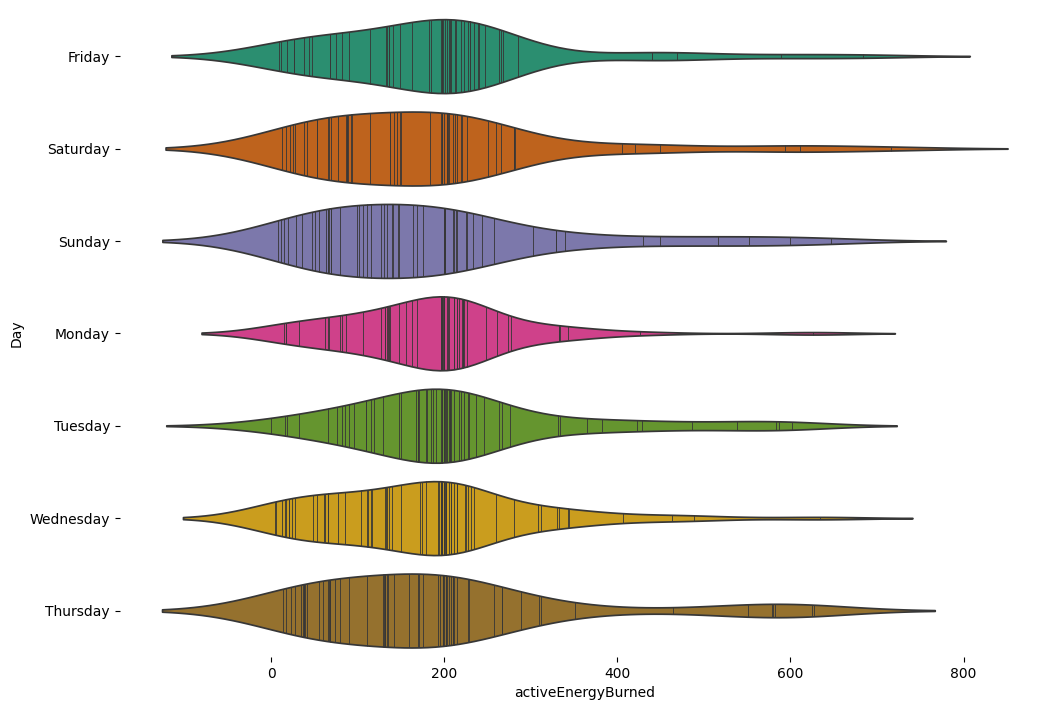

In [163]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(workout_routine_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(workout_routine_df, x='activeEnergyBurned', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

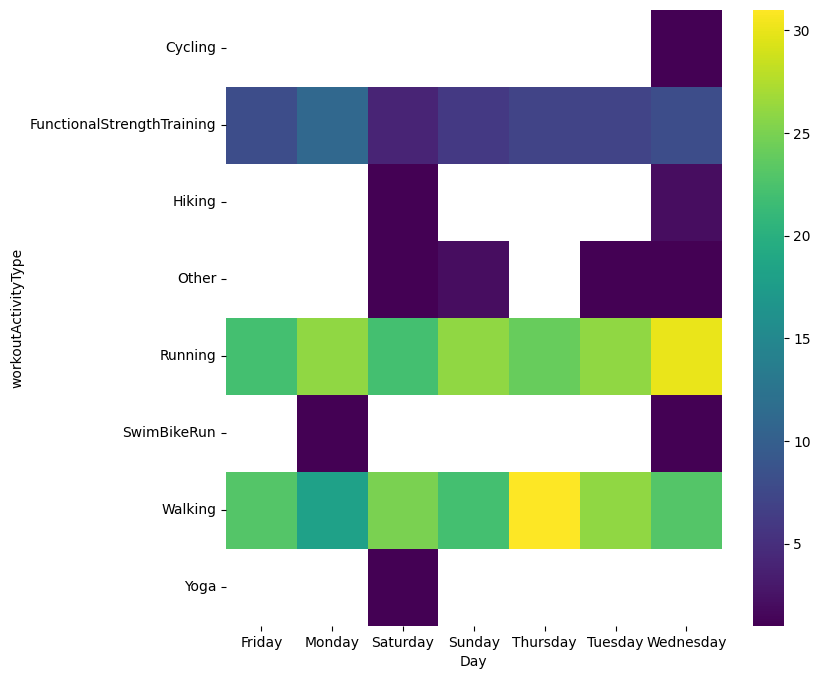

In [164]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['workoutActivityType'].value_counts()
    for x_label, grp in workout_routine_df.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('workoutActivityType')

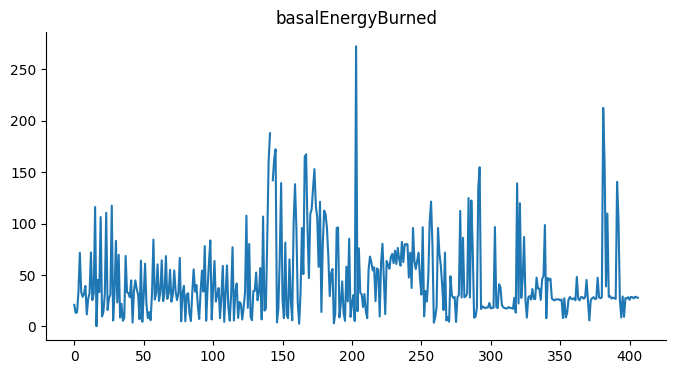

In [165]:
from matplotlib import pyplot as plt
workout_routine_df['basalEnergyBurned'].plot(kind='line', figsize=(8, 4), title='basalEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

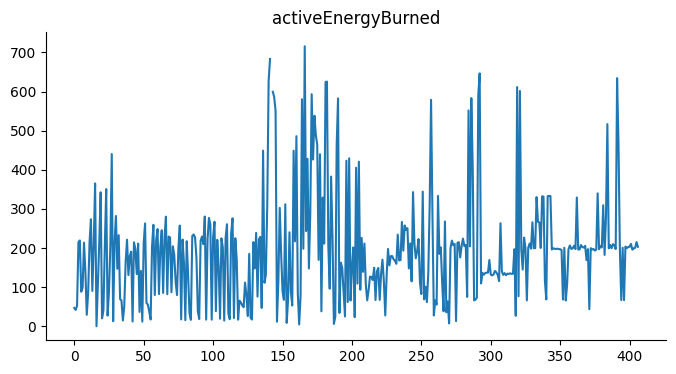

In [166]:
from matplotlib import pyplot as plt
workout_routine_df['activeEnergyBurned'].plot(kind='line', figsize=(8, 4), title='activeEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

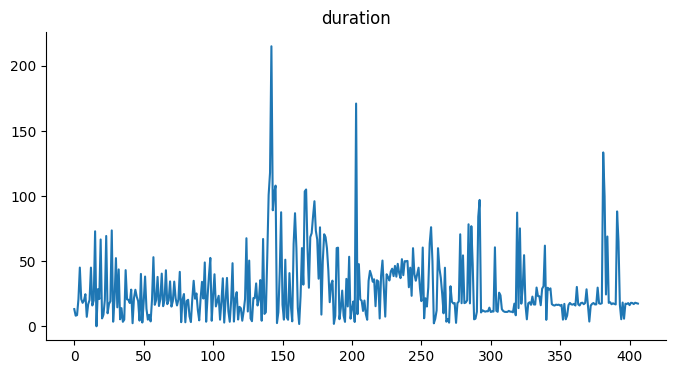

In [167]:
from matplotlib import pyplot as plt
workout_routine_df['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

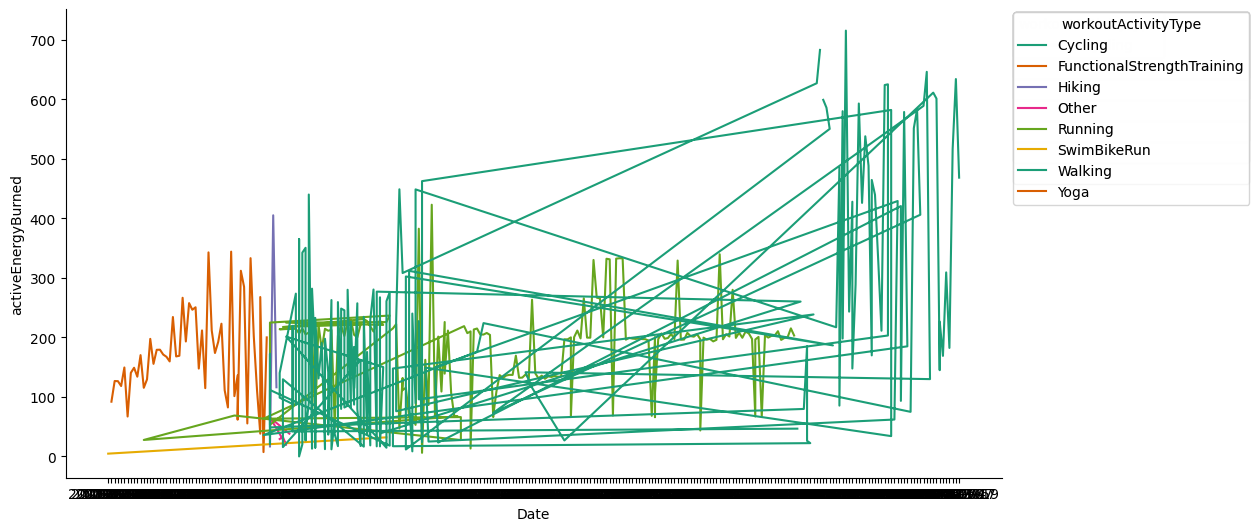

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['activeEnergyBurned']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('workoutActivityType')):
  _plot_series(series, series_name, i)
  fig.legend(title='workoutActivityType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('activeEnergyBurned')

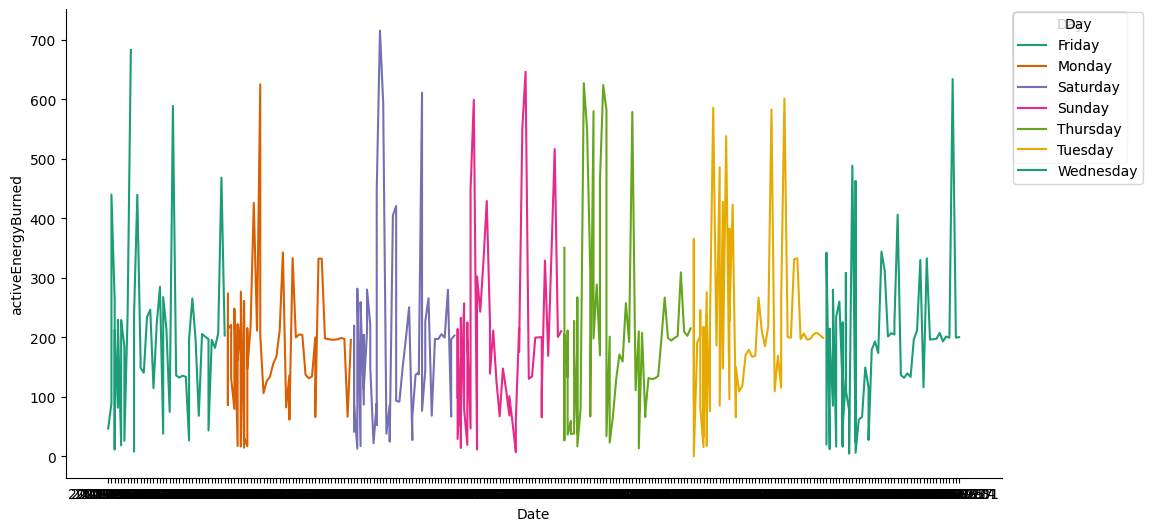

In [161]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['activeEnergyBurned']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('activeEnergyBurned')

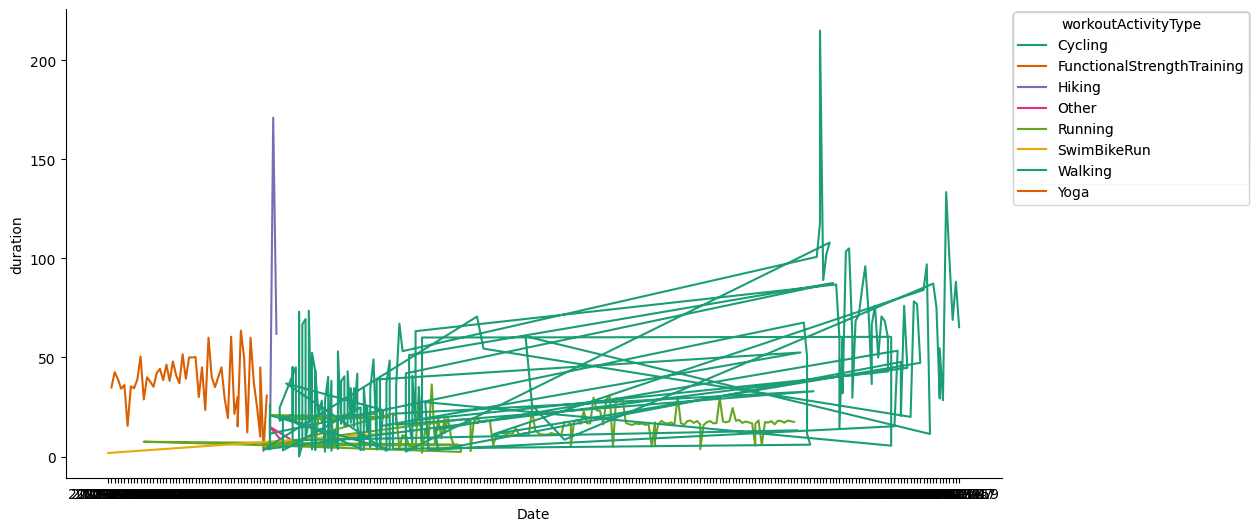

In [160]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('workoutActivityType')):
  _plot_series(series, series_name, i)
  fig.legend(title='workoutActivityType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

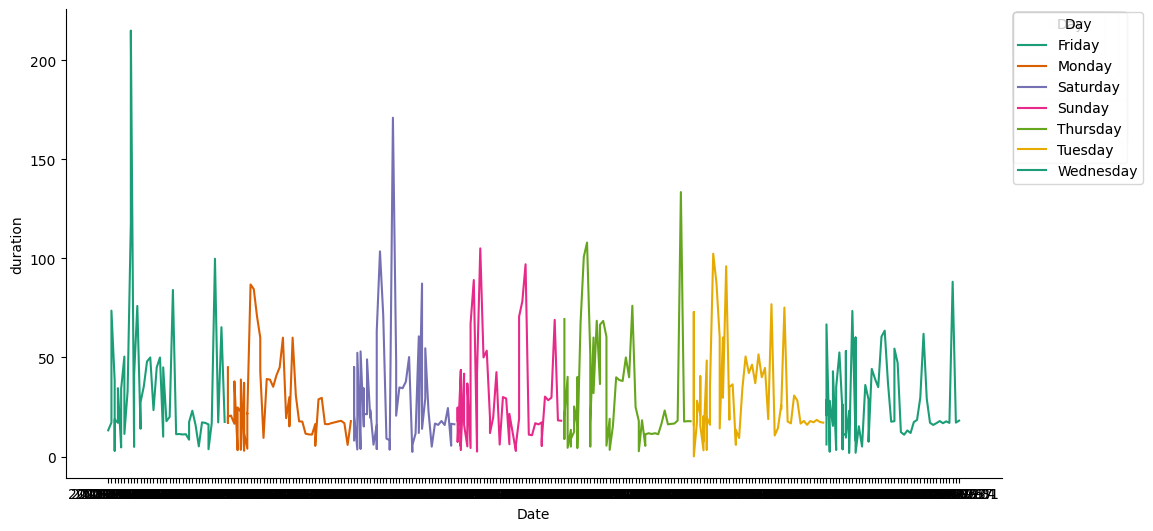

In [159]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = workout_routine_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

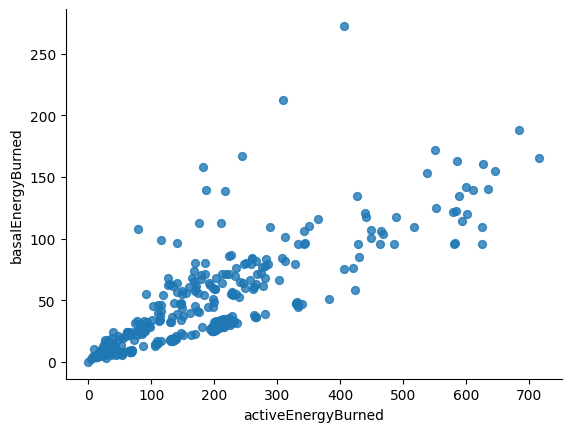

In [158]:
from matplotlib import pyplot as plt
workout_routine_df.plot(kind='scatter', x='activeEnergyBurned', y='basalEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

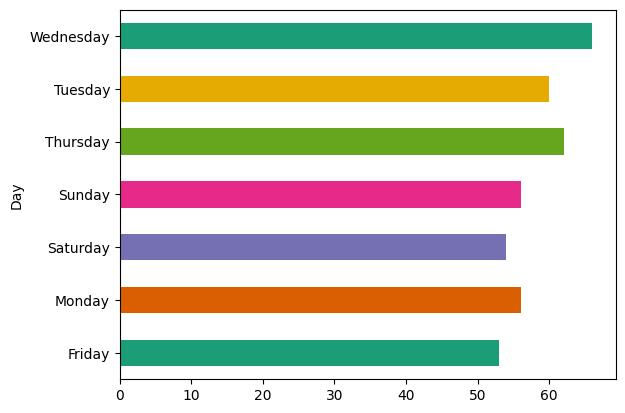

In [174]:
from matplotlib import pyplot as plt
import seaborn as sns
workout_routine_df.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

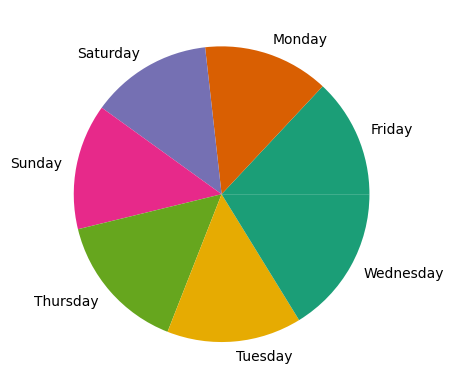

In [173]:
from matplotlib import pyplot as plt
import seaborn as sns
workout_routine_df.groupby('Day').size().plot(kind='pie', colors=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

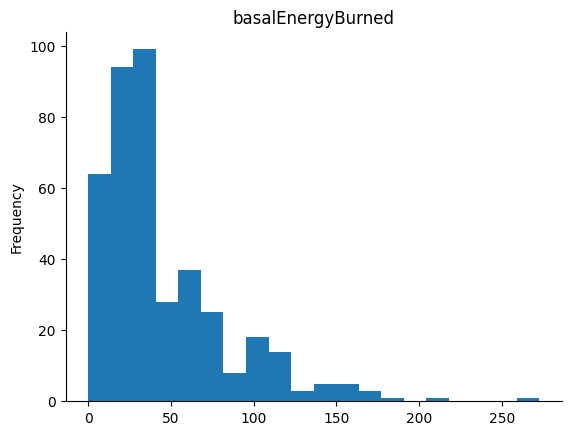

In [154]:
from matplotlib import pyplot as plt
workout_routine_df['basalEnergyBurned'].plot(kind='hist', bins=20, title='basalEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

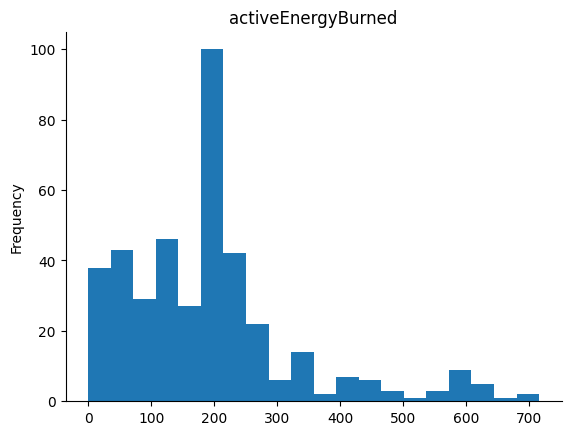

In [153]:
from matplotlib import pyplot as plt
workout_routine_df['activeEnergyBurned'].plot(kind='hist', bins=20, title='activeEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

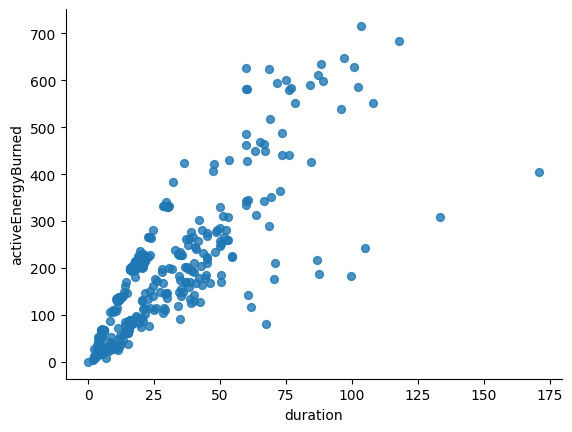

In [151]:
from matplotlib import pyplot as plt
workout_routine_df.plot(kind='scatter', x='duration', y='activeEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [180]:
#final_workout_df_cleaned.tail(1)


running = final_workout_df_cleaned[final_workout_df_cleaned['workoutActivityType']=='Running']

In [183]:
running

Day        Date workoutActivityType   duration durationUnit  \
3     Saturday  2023-05-27             Running  20.841052          min   
7       Sunday  2023-05-28             Running  19.884241          min   
11      Monday  2023-05-29             Running  20.209657          min   
14     Tuesday  2023-05-30             Running  19.915887          min   
18   Wednesday  2023-05-31             Running  20.974396          min   
..         ...         ...                 ...        ...          ...   
402     Monday  2024-07-29             Running  17.899434          min   
403    Tuesday  2024-07-30             Running  17.099278          min   
404  Wednesday  2024-07-31             Running  18.124384          min   
405   Thursday  2024-08-01             Running  17.823000          min   
406     Friday  2024-08-02             Running  17.463801          min   

     activeEnergyBurned  basalEnergyBurned  
3               214.956            33.1512  
7               213.841            31.7116  
11              214.595            32.0923  
14              206.721            31.7034  
18              215.044            33.4513  
..                  ...                ...  
402             195.892            28.3807  
403             199.250            27.1787  
404             200.503            28.8205  
405             215.286            28.3479  
406             203.294            27.7861  

[176 rows x 7 columns]

from matplotlib import pyplot as plt
running['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
running['activeEnergyBurned'].plot(kind='hist', bins=20, title='activeEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
running['basalEnergyBurned'].plot(kind='hist', bins=20, title='basalEnergyBurned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
running.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
running.plot(kind='scatter', x='duration', y='activeEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
running.plot(kind='scatter', x='activeEnergyBurned', y='basalEnergyBurned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = running.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['activeEnergyBurned']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = running.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('activeEnergyBurned')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['basalEnergyBurned']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = running.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('basalEnergyBurned')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = running.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
running['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
running['activeEnergyBurned'].plot(kind='line', figsize=(8, 4), title='activeEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
running['basalEnergyBurned'].plot(kind='line', figsize=(8, 4), title='basalEnergyBurned')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(running['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(running, x='duration', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(running['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(running, x='activeEnergyBurned', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(running['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(running, x='basalEnergyBurned', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

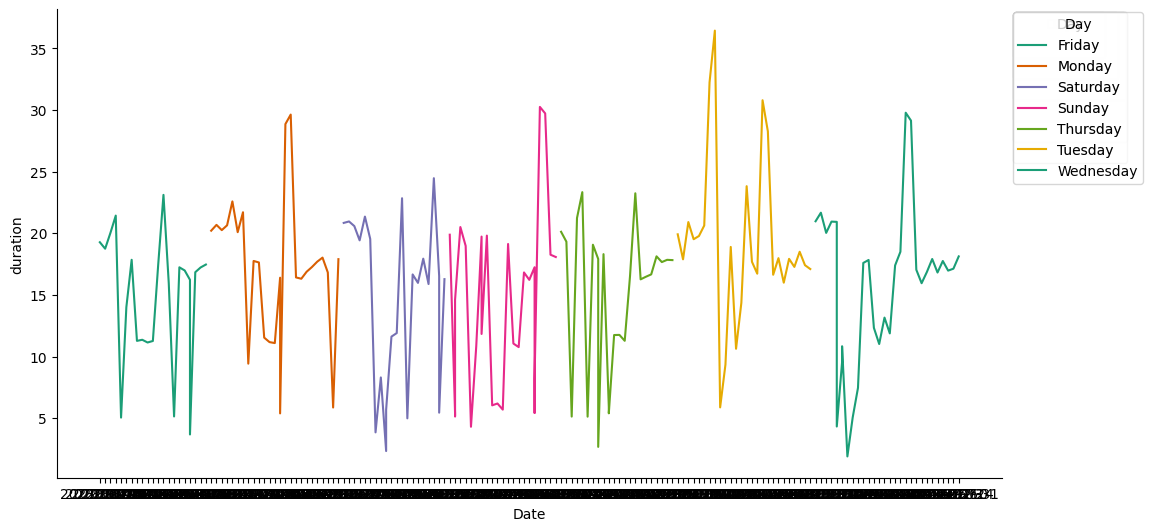

In [187]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = running.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration')

In [188]:
walking = final_workout_df_cleaned[final_workout_df_cleaned['workoutActivityType']=='Walking']

In [189]:
walking

Day        Date workoutActivityType    duration durationUnit  \
0       Friday  2023-05-26             Walking   13.233744          min   
1     Saturday  2023-05-27             Walking    8.179894          min   
2     Saturday  2023-05-27             Walking    8.640193          min   
4     Saturday  2023-05-27             Walking   45.125858          min   
5     Saturday  2023-05-27             Walking   20.962100          min   
..         ...         ...                 ...         ...          ...   
381   Thursday  2024-07-04             Walking  133.500650          min   
382     Friday  2024-07-05             Walking   99.851571          min   
384     Sunday  2024-07-07             Walking   68.964099          min   
391  Wednesday  2024-07-17             Walking   88.221717          min   
392     Friday  2024-07-19             Walking   65.277273          min   

     activeEnergyBurned  basalEnergyBurned  
0               46.7260            20.9089  
1               41.9785            13.1135  
2               52.6920            13.6000  
4              219.4650            71.6326  
5               88.2178            33.3390  
..                  ...                ...  
381            309.3650           212.5680  
382            182.4390           158.2590  
384            516.7160           109.7700  
391            634.3580           140.5240  
392            468.6350           103.9130  

[168 rows x 7 columns]

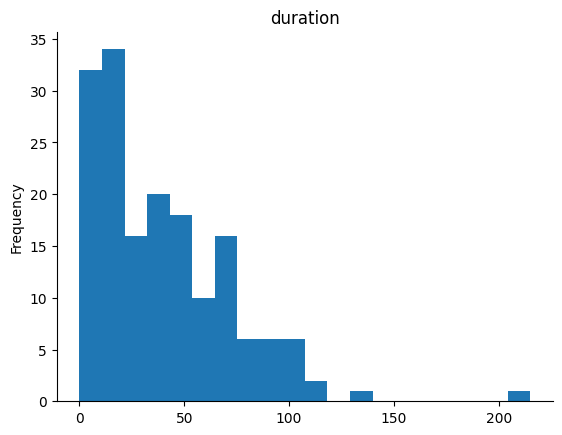

In [195]:
# @title duration

from matplotlib import pyplot as plt
walking['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

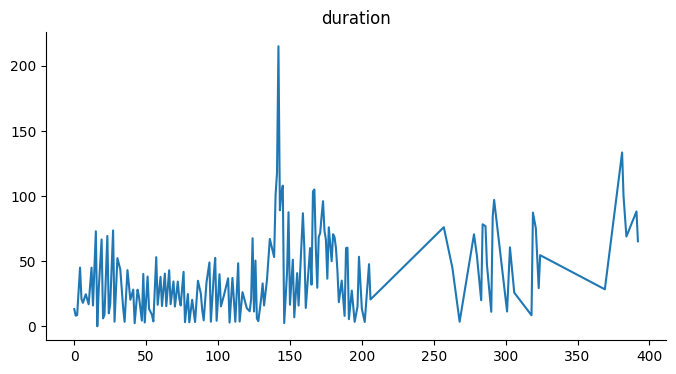

In [194]:
# @title duration

from matplotlib import pyplot as plt
walking['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

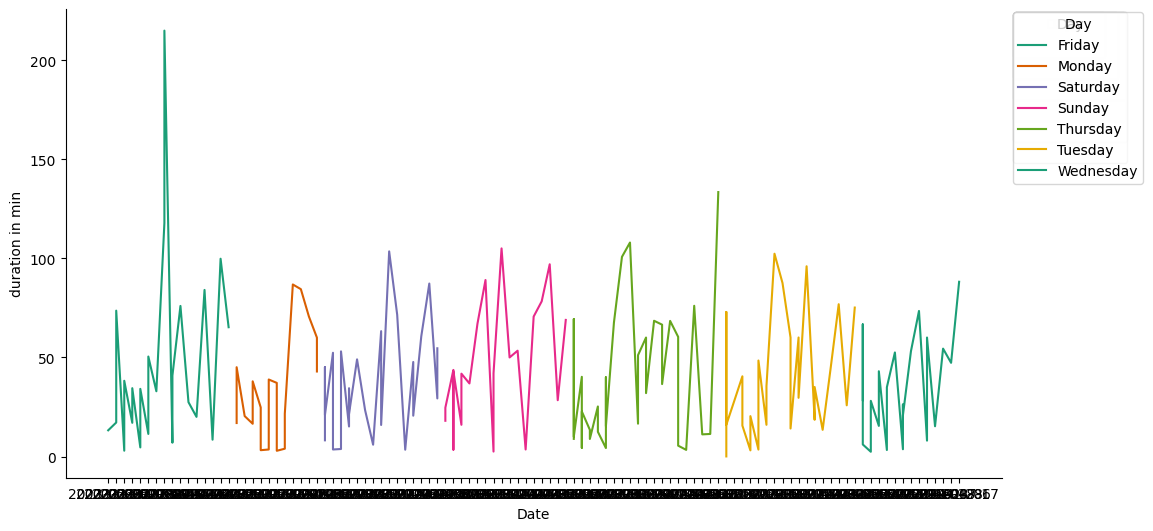

In [193]:
# @title Date vs duration

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['duration']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = walking.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('duration in min')

In [ ]:
record_data.tail(1)

type  \
1028031  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion unit               creationDate  \
1028031  Haris’s Apple Watch          10.4   ms  2024-05-03 08:28:28 +0500   

                         startDate                    endDate    value  \
1028031  2024-05-03 08:27:27 +0500  2024-05-03 08:28:26 +0500  68.0076   

                                                    device  
1028031  <<HKDevice: 0x302833750>, name:Apple Watch, ma...

Empty DataFrame
Columns: []
Index: []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = record_data.drop('sourceName', axis=1)                          # droped , may be all have 1
y = record_data['sourceName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

In [ ]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

In [ ]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_gini and dt_entropy are the trained Decision Tree models

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
#plt.savefig('/Decision_Tree_Gini.pdf')
plt.show()
plt.close()

In [58]:
record_data

type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]

In [64]:
df_steps = record_data.query('type == "HKQuantityTypeIdentifierStepCount"')

In [59]:
#####df_steps.head()

In [65]:
#df_steps.to_csv("/content/drive/My Drive/Classroom/watch8/steps.csv", index=False)

In [ ]:
!ls "/content/drive/My Drive/Classroom/watch8/"                 #checking directory under watch8 folder

export_cda_May_2024.xml  export_May_2024.xml  hr.csv  steps.csv  walk_run_s.csv


In [66]:
#from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt


In [67]:
%matplotlib inline

In [68]:
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Asia/Karachi'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #not a good way
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #not good in CS
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

In [69]:
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['year'] = df_steps['startDate'].map(get_year)
df_steps['month'] = df_steps['startDate'].map(get_month)
df_steps['date'] = df_steps['startDate'].map(get_date)
df_steps['day'] = df_steps['startDate'].map(get_day)
df_steps['hour'] = df_steps['startDate'].map(get_hour)
df_steps['dow'] = df_steps['startDate'].map(get_day_of_week)

<ipython-input-69-e8d89afc6143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
<ipython-input-69-e8d89afc6143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps['year'] = df_steps['startDate'].map(get_year)
<ipython-input-69-e8d89afc6143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [70]:
df_steps.tail(1)

type           sourceName sourceVersion  \
213249  HKQuantityTypeIdentifierStepCount  Haris’s Apple Watch          10.5   

         unit               creationDate                 startDate  \
213249  count  2024-08-02 22:22:52 +0500 2024-08-02 22:06:35+05:00   

                          endDate value  \
213249  2024-08-02 22:10:28 +0500    34   

                                                   device  year    month  \
213249  <<HKDevice: 0x301e242d0>, name:Apple Watch, ma...  2024  2024-08   

              date  day  hour  dow  
213249  2024-08-03    3     3    5

In [71]:
steps_by_date = df_steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

/usr/local/lib/python3.10/dist-packages/pandas/core/window/rolling.py:370: RuntimeWarning: overflow encountered in cast
  values = ensure_float64(values)


<Axes: title={'center': 'Daily step counts rolling mean over 30 days'}, xlabel='date'>

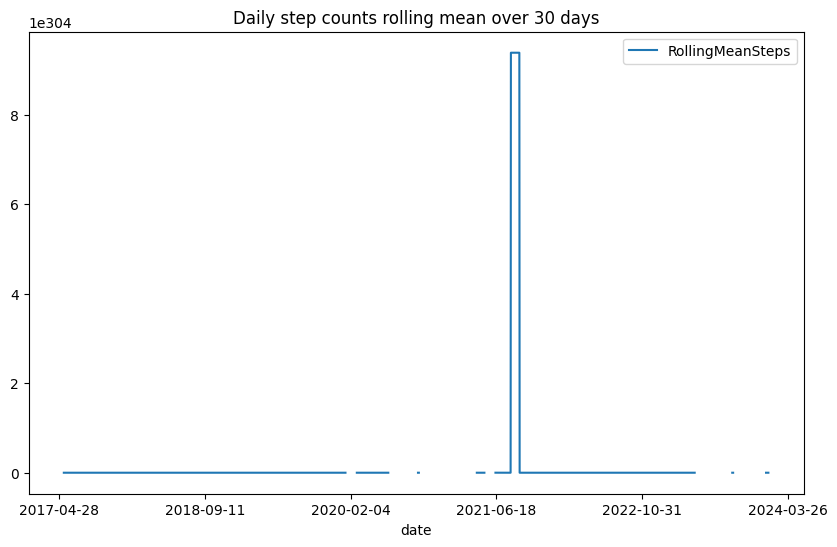

In [72]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=30, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 30 days', figsize=[10, 6])

In [73]:
df_steps['value'] = pd.to_numeric(df_steps['value'])
total_steps_by_month = df_steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

total_steps_by_month

<ipython-input-73-6d6471dbd5c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps['value'] = pd.to_numeric(df_steps['value'])


month   Steps
0   2017-04   10194
1   2017-05  220608
2   2017-06  192379
3   2017-07  254396
4   2017-08  180687
..      ...     ...
84  2024-04  558732
85  2024-05  436375
86  2024-06  401509
87  2024-07  580346
88  2024-08   55250

[89 rows x 2 columns]

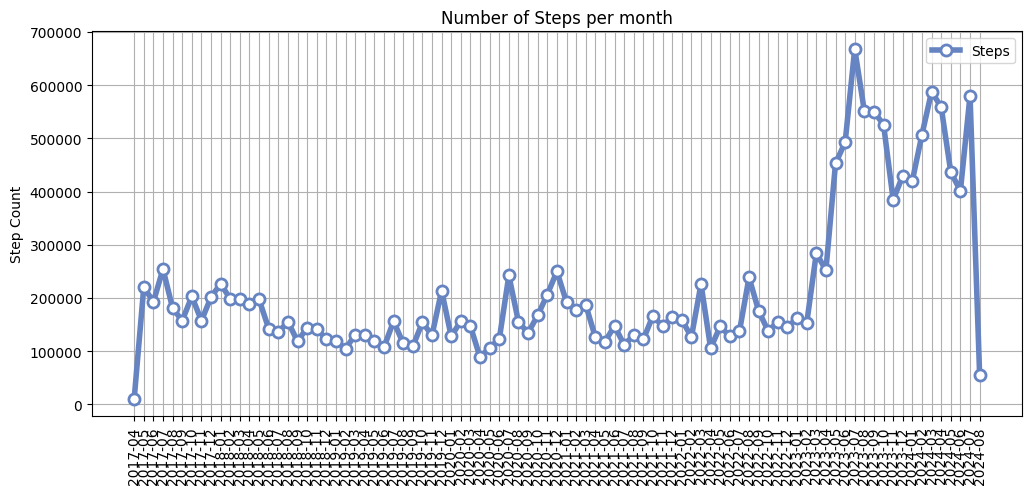

In [74]:
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [75]:
df_steps['value'] = pd.to_numeric(df_steps['value'])
total_steps_by_year = df_steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

total_steps_by_year

<ipython-input-75-6dd688af8eac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps['value'] = pd.to_numeric(df_steps['value'])


year    Steps
0  2017  1577213
1  2018  1968405
2  2019  1588797
3  2020  1903383
4  2021  1790361
5  2022  1881842
6  2023  4905297
7  2024  3548024

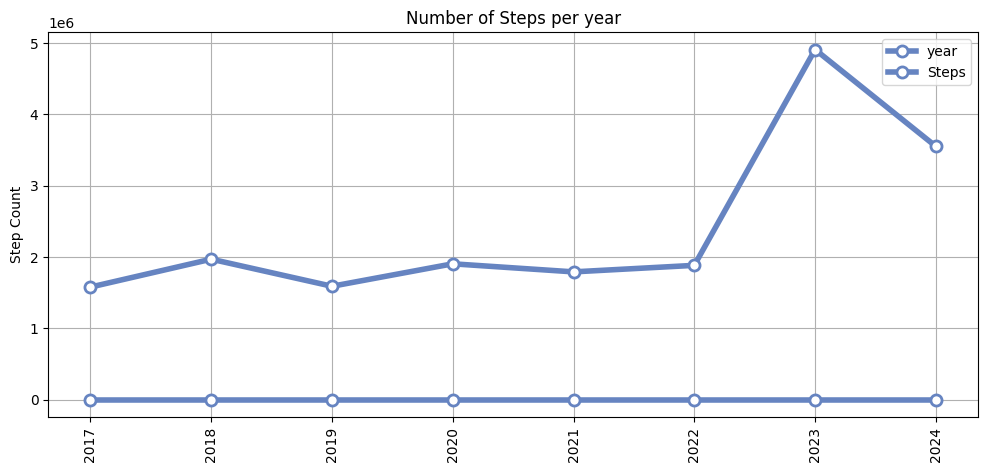

In [76]:
dataset_two = total_steps_by_year
chart_title = 'Number of Steps per year'

n_groups = len(dataset_two)
index = np.arange(n_groups)

ax = dataset_two.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
plt.xticks(index, dataset_two.year, rotation=90)
ax.set_title(chart_title)

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/window/rolling.py:370: RuntimeWarning: overflow encountered in cast
  values = ensure_float64(values)


<Axes: title={'center': 'Daily step counts rolling mean over 10 days'}, xlabel='date'>

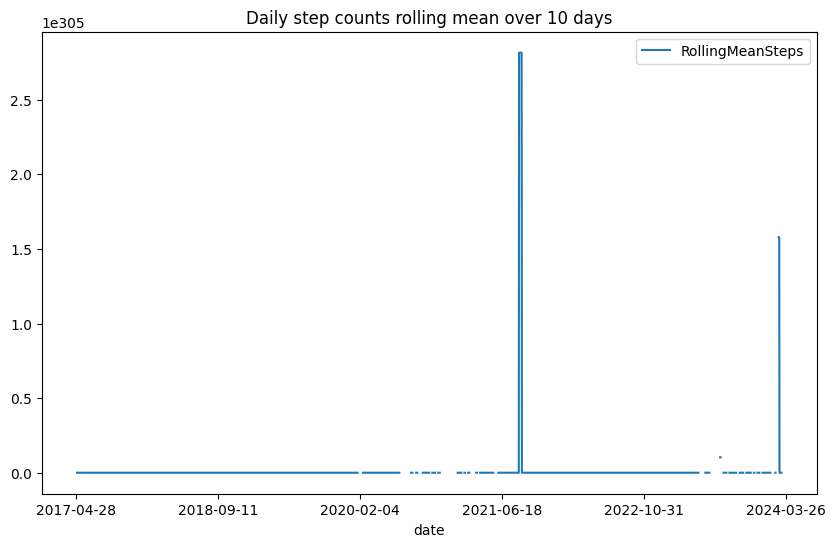

In [77]:
###########################
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

In [78]:
############################
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

In [79]:

##########################################
df_steps['value'] = pd.to_numeric(df_steps['value'])
total_steps_by_month = df_steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

total_steps_by_month

<ipython-input-79-588fcc052c2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps['value'] = pd.to_numeric(df_steps['value'])


month   Steps
0   2017-04   10194
1   2017-05  220608
2   2017-06  192379
3   2017-07  254396
4   2017-08  180687
..      ...     ...
84  2024-04  558732
85  2024-05  436375
86  2024-06  401509
87  2024-07  580346
88  2024-08   55250

[89 rows x 2 columns]

In [80]:
df_hr = record_data.query('type == "HKQuantityTypeIdentifierHeartRate"')

In [81]:
df_hr.to_csv("/content/drive/My Drive/Classroom/watch8/hr.csv", index=False)

In [ ]:
df_hr.tail(1)

type           sourceName sourceVersion  \
53087  HKQuantityTypeIdentifierHeartRate  Haris’s Apple Watch          10.3   

            unit               creationDate                  startDate  \
53087  count/min  2024-05-29 11:33:15 +0500  2024-01-29 17:49:02 +0500   

                         endDate    value  \
53087  2024-01-29 17:58:43 +0500  117.784   

                                                  device  
53087  <<HKDevice: 0x30289f9d0>, name:Apple Watch, ma...

In [82]:
df_hr['startDate'] = pd.to_datetime(df_hr['startDate'])
df_hr['year'] = df_hr['startDate'].map(get_year)
df_hr['month'] = df_hr['startDate'].map(get_month)
df_hr['date'] = df_hr['startDate'].map(get_date)
df_hr['day'] = df_hr['startDate'].map(get_day)
df_hr['hour'] = df_hr['startDate'].map(get_hour)
df_hr['dow'] = df_hr['startDate'].map(get_day_of_week)

<ipython-input-82-f92bab82acd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['startDate'] = pd.to_datetime(df_hr['startDate'])
<ipython-input-82-f92bab82acd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['year'] = df_hr['startDate'].map(get_year)
<ipython-input-82-f92bab82acd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [83]:
df_hr['value'] = pd.to_numeric(df_hr['value'])
total_beats_by_month = df_hr.groupby(['month'])['value'].sum().reset_index(name='value')

total_beats_by_month

<ipython-input-83-0b31009f06fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['value'] = pd.to_numeric(df_hr['value'])


month         value
0   2023-05  1.309588e+05
1   2023-06  2.339516e+05
2   2023-07  2.890364e+05
3   2023-08  1.163209e+05
4   2023-09  1.876446e+05
5   2023-10  2.631123e+05
6   2023-11  5.946679e+04
7   2023-12  1.476273e+05
8   2024-01  3.191265e+05
9   2024-02  2.749064e+05
10  2024-03  1.865296e+05
11  2024-04  8.968113e+05
12  2024-05  8.714325e+05
13  2024-06  9.687963e+05
14  2024-07  1.485788e+06
15  2024-08  6.024100e+04

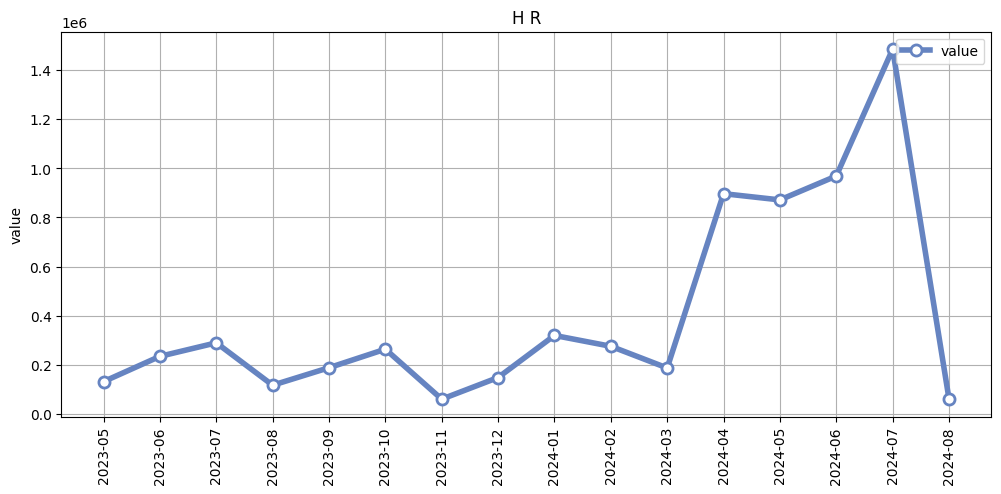

In [84]:
dataset_hr = total_beats_by_month
chart_title = 'H R'

n_groups = len(dataset_hr)
index = np.arange(n_groups)

ax = dataset_hr.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
ax.set_ylabel('value')
plt.xticks(index, dataset_hr.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [ ]:
#final_workout_df.tail(1)

workoutActivityType           duration durationUnit  \
349  HKWorkoutActivityTypeRunning  16.63371624946594          min   

              sourceName sourceVersion  \
349  Haris’s Apple Watch          10.4   

                                                device  \
349  <<HKDevice: 0x3028114f0>, name:Apple Watch, ma...   

                  creationDate                  startDate  \
349  2024-05-28 18:07:53 +0500  2024-05-28 17:51:05 +0500   

                       endDate basalEnergyBurned activeEnergyBurned  
349  2024-05-28 18:07:43 +0500           26.4217              197.3

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['creationDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'creationDate'}, axis=1)
              .sort_values('creationDate', ascending=True))
  xs = counted['creationDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('creationDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('creationDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['startDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'startDate'}, axis=1)
              .sort_values('startDate', ascending=True))
  xs = counted['startDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('startDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('startDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['endDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'endDate'}, axis=1)
              .sort_values('endDate', ascending=True))
  xs = counted['endDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('endDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('endDate')
_ = plt.ylabel('count()')

In [85]:
record_data.loc[record_data['type']=='HKQuantityTypeIdentifierDistanceWalkingRunning'].tail(2)

type           sourceName  \
388877  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
388878  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
388877          10.5   km  2024-08-02 22:08:11 +0500   
388878          10.5   km  2024-08-02 22:22:52 +0500   

                        startDate                    endDate       value  \
388877  2024-08-02 21:56:36 +0500  2024-08-02 22:06:35 +0500  0.00968069   
388878  2024-08-02 22:06:35 +0500  2024-08-02 22:10:28 +0500   0.0231958   

                                                   device  
388877  <<HKDevice: 0x301d95360>, name:Apple Watch, ma...  
388878  <<HKDevice: 0x301d95360>, name:Apple Watch, ma...

In [86]:
df_walk_run_s = record_data.query('type == "HKQuantityTypeIdentifierDistanceWalkingRunning"')

In [87]:
df_walk_run_s.to_csv("/content/drive/My Drive/Classroom/watch8/walk_run_s.csv", index=False)

In [88]:
df_walk_run_s.tail(1)

type           sourceName  \
388878  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
388878          10.5   km  2024-08-02 22:22:52 +0500   

                        startDate                    endDate      value  \
388878  2024-08-02 22:06:35 +0500  2024-08-02 22:10:28 +0500  0.0231958   

                                                   device  
388878  <<HKDevice: 0x301d95360>, name:Apple Watch, ma...

In [ ]:
#df_walk_run_s.info

<bound method DataFrame.info of                                                   type           sourceName  \
193980  HKQuantityTypeIdentifierDistanceWalkingRunning       Haris’s iPhone   
193981  HKQuantityTypeIdentifierDistanceWalkingRunning       Haris’s iPhone   
193982  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
193983  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
193984  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
...                                                ...                  ...   
359345  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
359346  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
359347  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
359348  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   
359349  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate startDate  \
193980          16.6   km  2023-08-03 13:02:44 +0500       NaT   
193981          16.6   km  2023-08-03 13:02:44 +0500       NaT   
193982         9.5.1   km  2023-07-07 06:23:32 +0500       NaT   
193983         9.5.1   km  2023-07-07 06:33:58 +0500       NaT   
193984         9.5.1   km  2023-07-07 06:45:45 +0500       NaT   
...              ...  ...                        ...       ...   
359345          10.4   km  2024-05-29 13:07:37 +0500       NaT   
359346          10.4   km  2024-05-29 13:23:31 +0500       NaT   
359347          10.4   km  2024-05-29 13:32:17 +0500       NaT   
359348          10.4   km  2024-05-29 13:51:09 +0500       NaT   
359349          10.4   km  2024-05-29 14:25:48 +0500       NaT   

                          endDate     value  \
193980  2023-08-03 12:27:12 +0500  0.127030   
193981  2023-08-03 12:44:40 +0500  0.123640   
193982  2023-07-07 06:22:53 +0500  0.264085   
193983  2023-07-07 06:32:49 +0500  0.110389   
193984  2023-07-07 06:43:18 +0500  0.111822   
...                           ...       ...   
359345  2024-05-29 12:54:42 +0500  0.018371   
359346  2024-05-29 13:10:58 +0500  0.005506   
359347  2024-05-29 13:30:12 +0500  0.057963   
359348  2024-05-29 13:40:21 +0500  0.005506   
359349  2024-05-29 14:16:34 +0500  0.045987   

                                                   device  
193980  <<HKDevice: 0x302851bd0>, name:iPhone, manufac...  
193981  <<HKDevice: 0x302851bd0>, name:iPhone, manufac...  
193982  <<HKDevice: 0x302851680>, name:Apple Watch, ma...  
193983  <<HKDevice: 0x302851680>, name:Apple Watch, ma...  
193984  <<HKDevice: 0x302851680>, name:Apple Watch, ma...  
...                                                   ...  
359345  <<HKDevice: 0x3028ebde0>, name:Apple Watch, ma...  
359346  <<HKDevice: 0x3028ebde0>, name:Apple Watch, ma...  
359347  <<HKDevice: 0x3028ebde0>, name:Apple Watch, ma...  
359348  <<HKDevice: 0x3028ebde0>, name:Apple Watch, ma...  
359349  <<HKDevice: 0x3028ebde0>, name:Apple Watch, ma...  

[165370 rows x 9 columns]>

In [89]:
df_walk_run_s['endDate'] = pd.to_datetime(df_walk_run_s['endDate'])
df_walk_run_s['year'] = df_walk_run_s['endDate'].map(get_year)
df_walk_run_s['month'] = df_walk_run_s['endDate'].map(get_month)
df_walk_run_s['date'] = df_walk_run_s['endDate'].map(get_date)
df_walk_run_s['day'] = df_walk_run_s['endDate'].map(get_day)
df_walk_run_s['hour'] = df_walk_run_s['endDate'].map(get_hour)
df_walk_run_s['dow'] = df_walk_run_s['endDate'].map(get_day_of_week)

<ipython-input-89-9c245c12a843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_run_s['endDate'] = pd.to_datetime(df_walk_run_s['endDate'])
<ipython-input-89-9c245c12a843>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_run_s['year'] = df_walk_run_s['endDate'].map(get_year)
<ipython-input-89-9c245c12a843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [121]:
df_walk_run_s['startDate'] = pd.to_datetime(df_walk_run_s['startDate'])

<ipython-input-121-3fd645427689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_run_s['startDate'] = pd.to_datetime(df_walk_run_s['startDate'])


In [90]:
df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s['value'])
total_kms_by_month = df_walk_run_s.groupby(['month'])['value'].sum().reset_index(name='value')

total_kms_by_month

<ipython-input-90-3884929caf07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s['value'])


month       value
0   2017-04    5.184750
1   2017-05  133.191520
2   2017-06  111.286022
3   2017-07  146.993668
4   2017-08  107.769051
..      ...         ...
84  2024-04  440.708024
85  2024-05  351.889371
86  2024-06  323.181997
87  2024-07  460.233159
88  2024-08   45.318638

[89 rows x 2 columns]

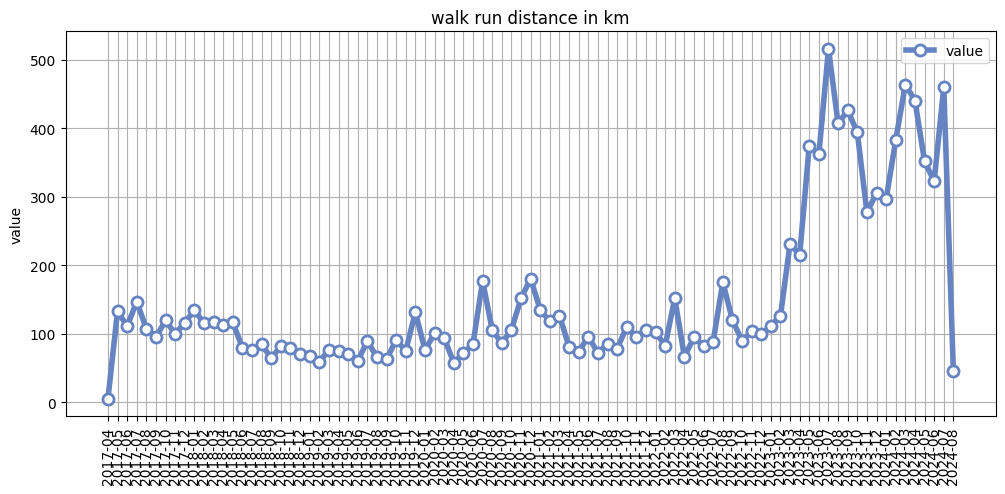

In [91]:
dataset_s = total_kms_by_month
chart_title = 'walk run distance in km'

n_groups = len(dataset_s)
index = np.arange(n_groups)

ax = dataset_s.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
ax.set_ylabel('value')
plt.xticks(index, dataset_s.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [92]:
#df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s['value'])
total_kms_by_year = df_walk_run_s.groupby(['year'])['value'].sum().reset_index(name='value')

total_kms_by_year

year        value
0  2017   935.808032
1  2018  1135.400984
2  2019   927.903291
3  2020  1294.610984
4  2021  1179.662423
5  2022  1259.355405
6  2023  3748.714622
7  2024  2765.202620

from matplotlib import pyplot as plt
total_kms_by_year['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_kms_by_year['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_kms_by_year.plot(kind='scatter', x='year', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_kms_by_year.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_kms_by_year.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
total_kms_by_year['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
total_kms_by_year['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

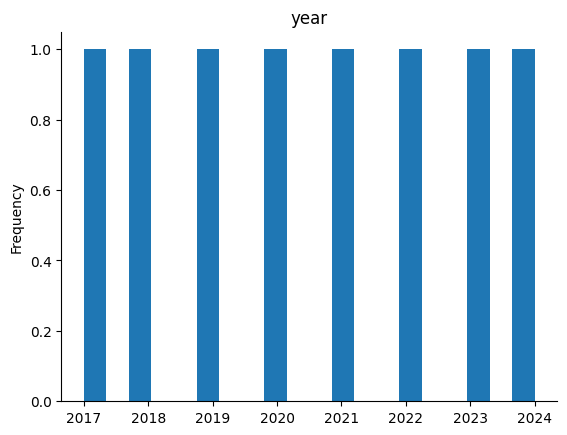

In [95]:
#from matplotlib import pyplot as plt
total_kms_by_year['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

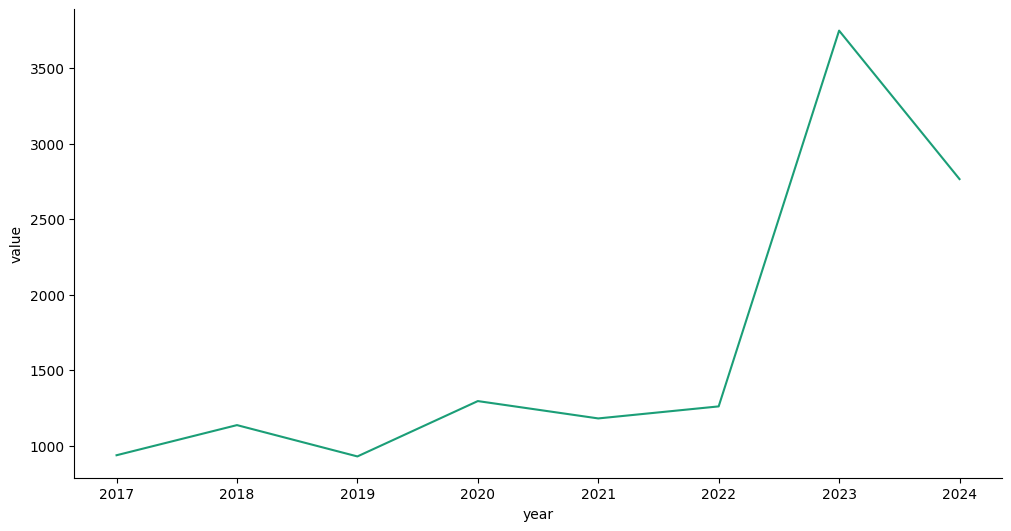

In [96]:
#from matplotlib import pyplot as plt
#import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_kms_by_year.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('value')

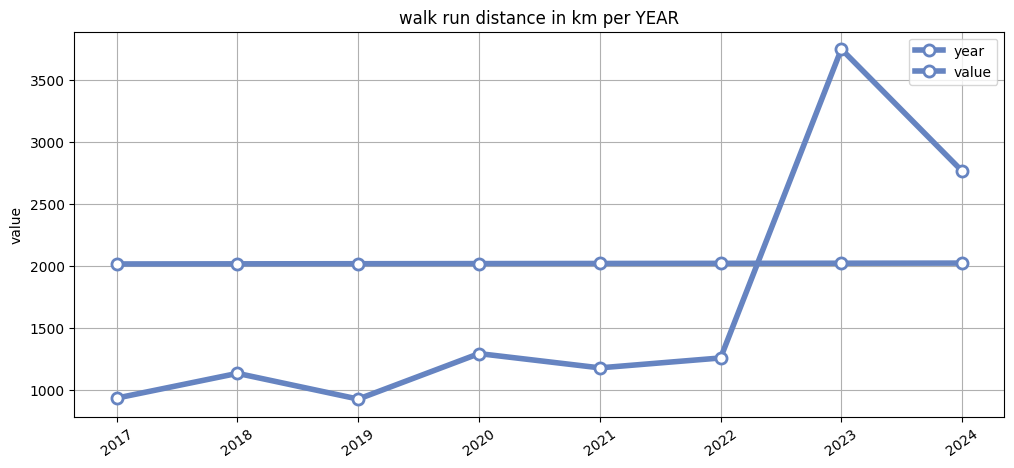

In [97]:
dataset_s_year = total_kms_by_year
chart_title = 'walk run distance in km per YEAR'

n_groups = len(dataset_s_year)
index = np.arange(n_groups)

ax = dataset_s_year.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
ax.set_ylabel('value')
plt.xticks(index, dataset_s_year.year, rotation=35)
ax.set_title(chart_title)

plt.show()

In [98]:
#df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s_day['value'])
total_kms_by_dte = df_walk_run_s.groupby(['date'])['value'].sum().reset_index(name='value')

total_kms_by_dte

date      value
0     2017-04-28   0.762230
1     2017-04-29   1.392080
2     2017-04-30   3.030440
3     2017-05-01   0.384780
4     2017-05-02   5.835230
...          ...        ...
2627  2024-07-30  20.249902
2628  2024-07-31  18.594183
2629  2024-08-01  19.623179
2630  2024-08-02  24.603200
2631  2024-08-03   1.092258

[2632 rows x 2 columns]

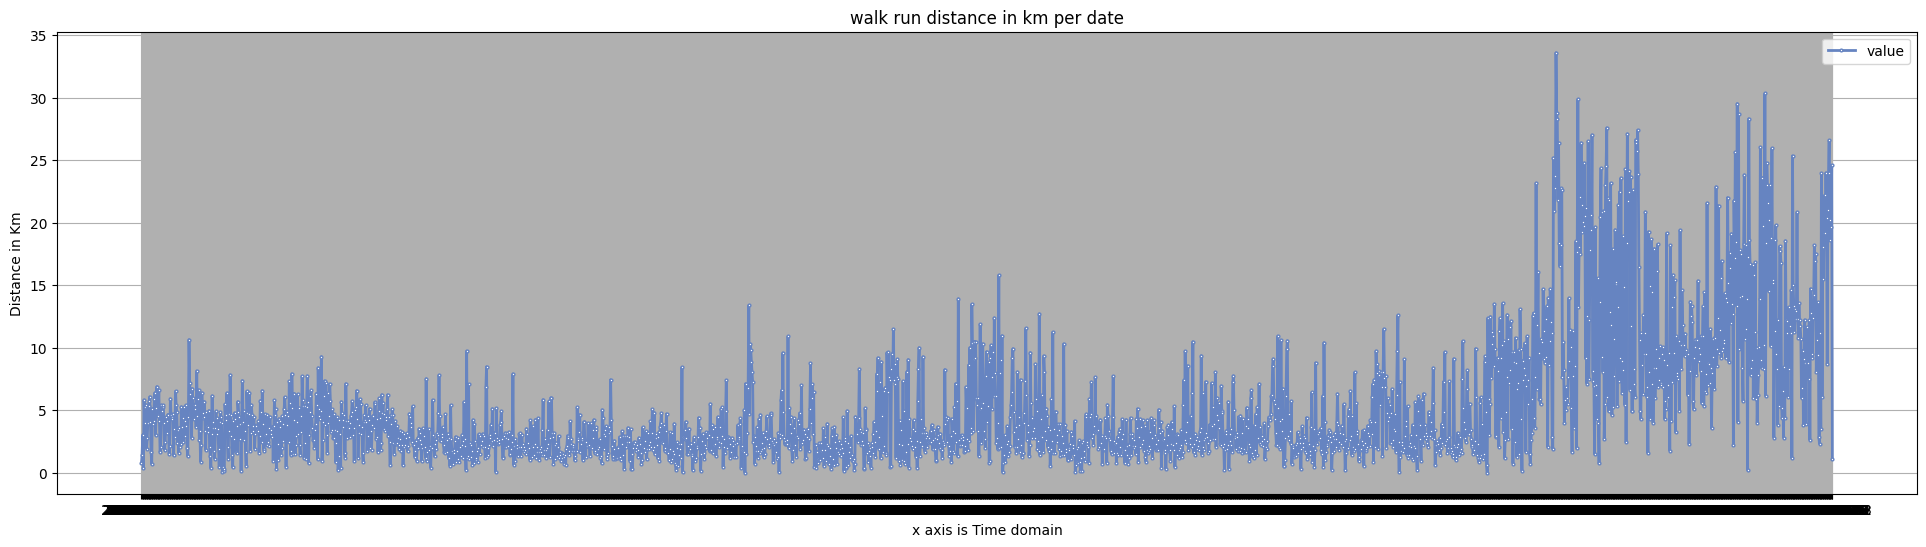

In [115]:
dataset_s_dte = total_kms_by_dte
chart_title = 'walk run distance in km per date'

n_groups = len(dataset_s_dte)
index = np.arange(n_groups)

ax = dataset_s_dte.plot(kind='line', figsize=[24, 6], linewidth=2, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=2, markeredgewidth=1)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
#ax.set_yticks(index)
ax.set_ylabel('Distance in Km')
ax.set_xlabel('x axis is Time domain')
plt.xticks(index, dataset_s_dte.date, rotation=0)
ax.set_title(chart_title)

plt.show()

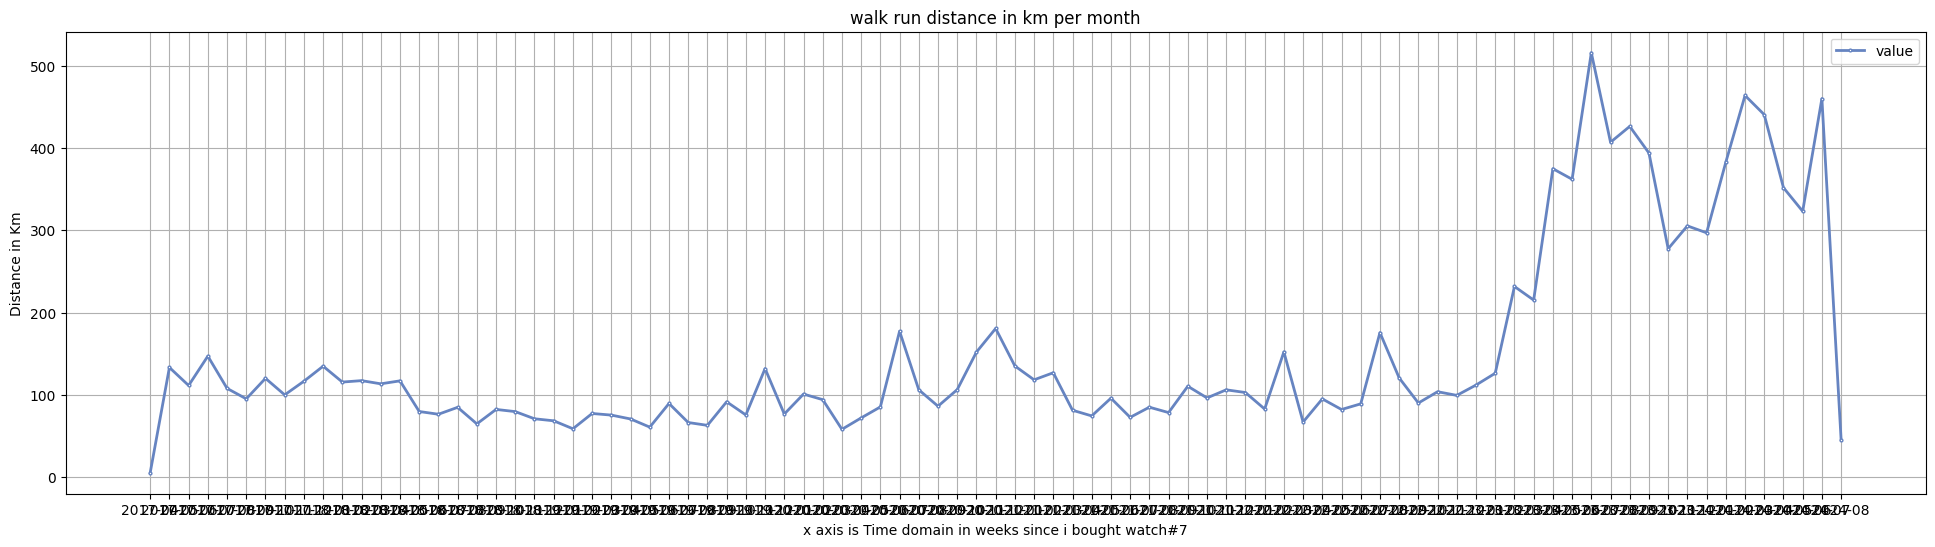

In [120]:
dataset_s = total_kms_by_month
chart_title = 'walk run distance in km per month'

n_groups = len(dataset_s)
index = np.arange(n_groups)

ax = dataset_s.plot(kind='line', figsize=[24, 6], linewidth=2, alpha=1, marker='o', color='#6684c1',
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=2, markeredgewidth=1)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xticks(index)
#ax.set_yticks(index)
ax.set_ylabel('Distance in Km')
ax.set_xlabel('x axis is Time domain in weeks since i bought watch#7')
plt.xticks(index, dataset_s.month, rotation=0)
ax.set_title(chart_title)

plt.show()

In [100]:
record_data.to_csv("/content/drive/My Drive/Classroom/watch8/export_csv_Aug_2_2024.csv", index=False)
# master data dump

In [134]:
df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s['value'])
total_kms_by_a_day = df_walk_run_s.groupby(['date'])['value'].sum().reset_index(name='value')
total_kms_by_a_day_o = df_walk_run_s.sort_values(['creationDate'] and ['value'])
#total_kms_by_a_day

total_kms_by_a_day_o.head(1)

<ipython-input-134-5bde637ed8a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_run_s['value'] = pd.to_numeric(df_walk_run_s['value'])


type           sourceName  \
361463  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
361463          10.4   km  2024-06-14 17:56:47 +0500   

                       startDate                   endDate         value  \
361463 2024-06-14 17:56:41+05:00 2024-06-14 17:56:44+05:00  4.656610e-13   

                                                   device  year    month  \
361463  <<HKDevice: 0x301e88190>, name:Apple Watch, ma...  2024  2024-06   

              date  day  hour  dow  
361463  2024-06-14   14    22    4

In [123]:
df_walk_run_s.tail(1)

type           sourceName  \
388878  HKQuantityTypeIdentifierDistanceWalkingRunning  Haris’s Apple Watch   

       sourceVersion unit               creationDate  \
388878          10.5   km  2024-08-02 22:22:52 +0500   

                       startDate                   endDate     value  \
388878 2024-08-02 22:06:35+05:00 2024-08-02 22:10:28+05:00  0.023196   

                                                   device  year    month  \
388878  <<HKDevice: 0x301d95360>, name:Apple Watch, ma...  2024  2024-08   

              date  day  hour  dow  
388878  2024-08-03    3     3    5

In [103]:
import missingno as msno   # importing lib whic have rich fun's(missing numbers)

<Axes: >

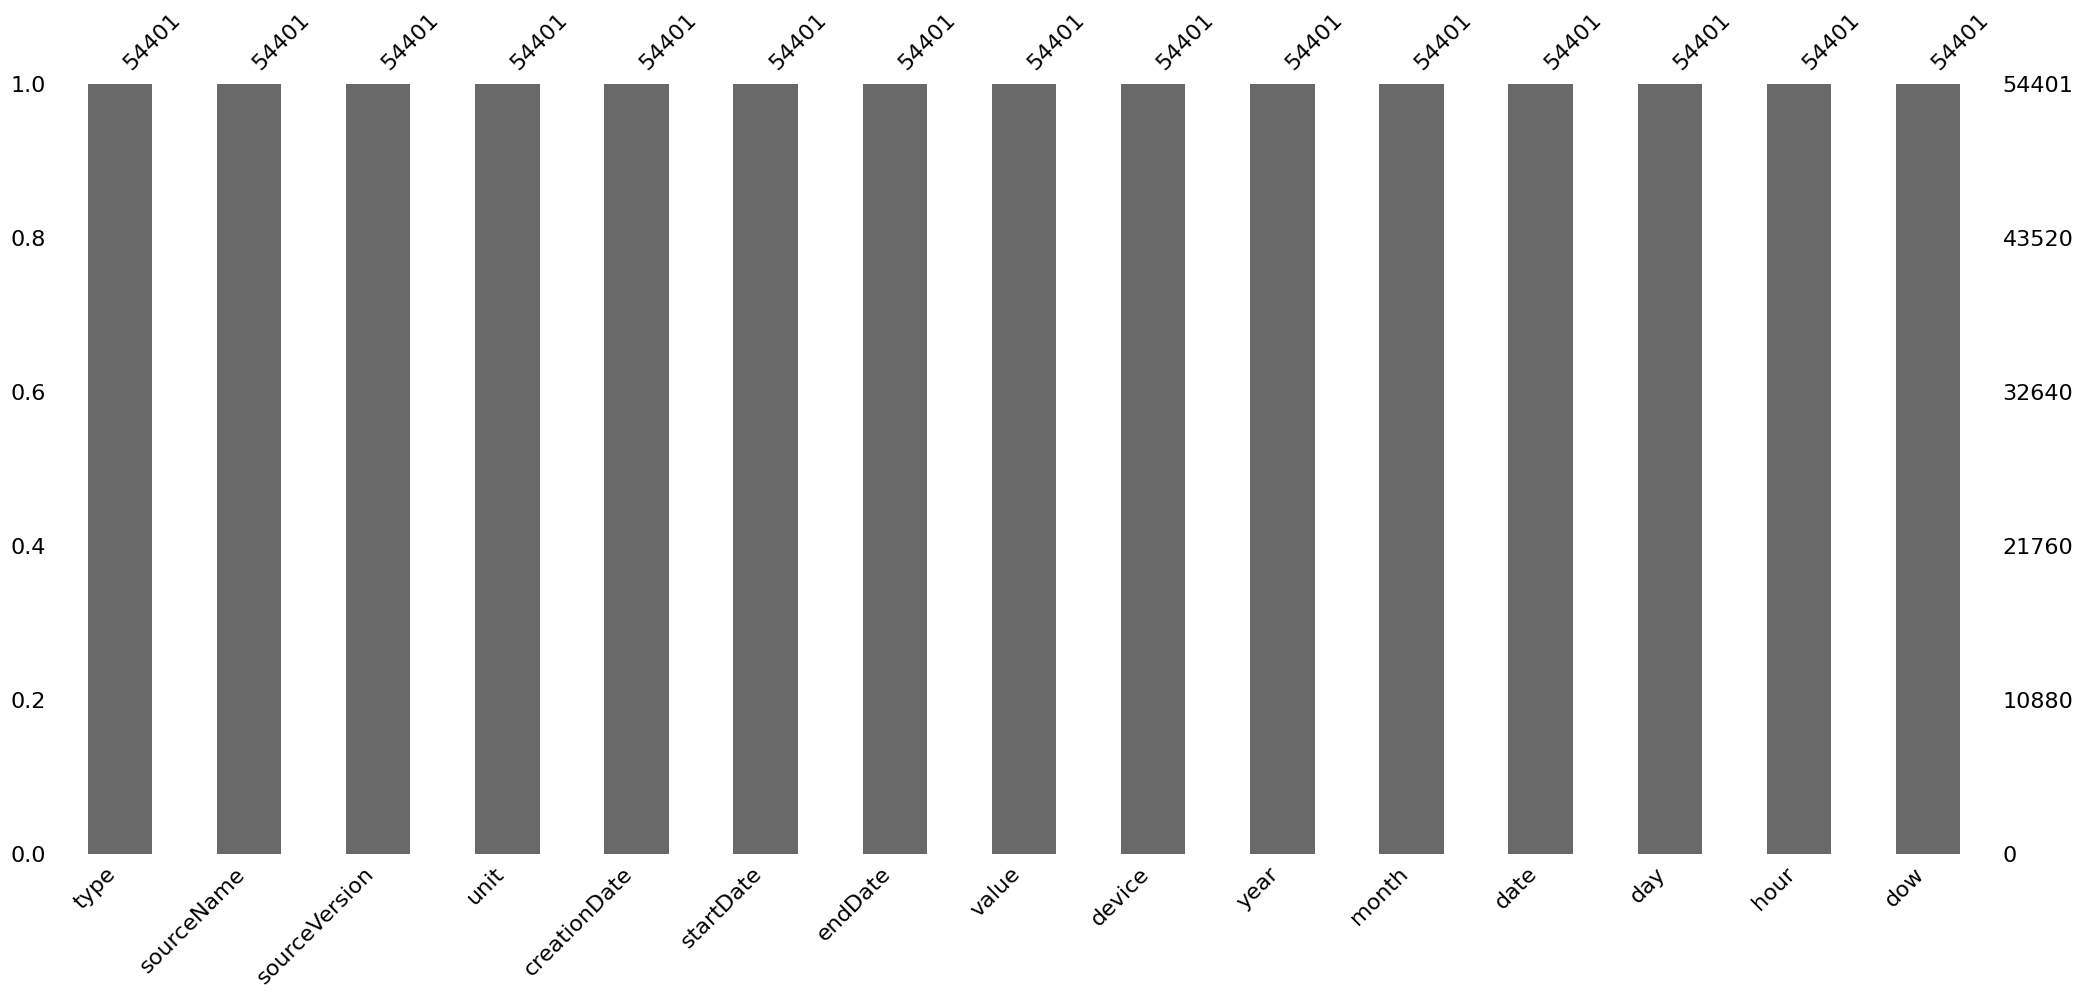

In [111]:
bar=msno.bar(df_hr)
bar

<Axes: >

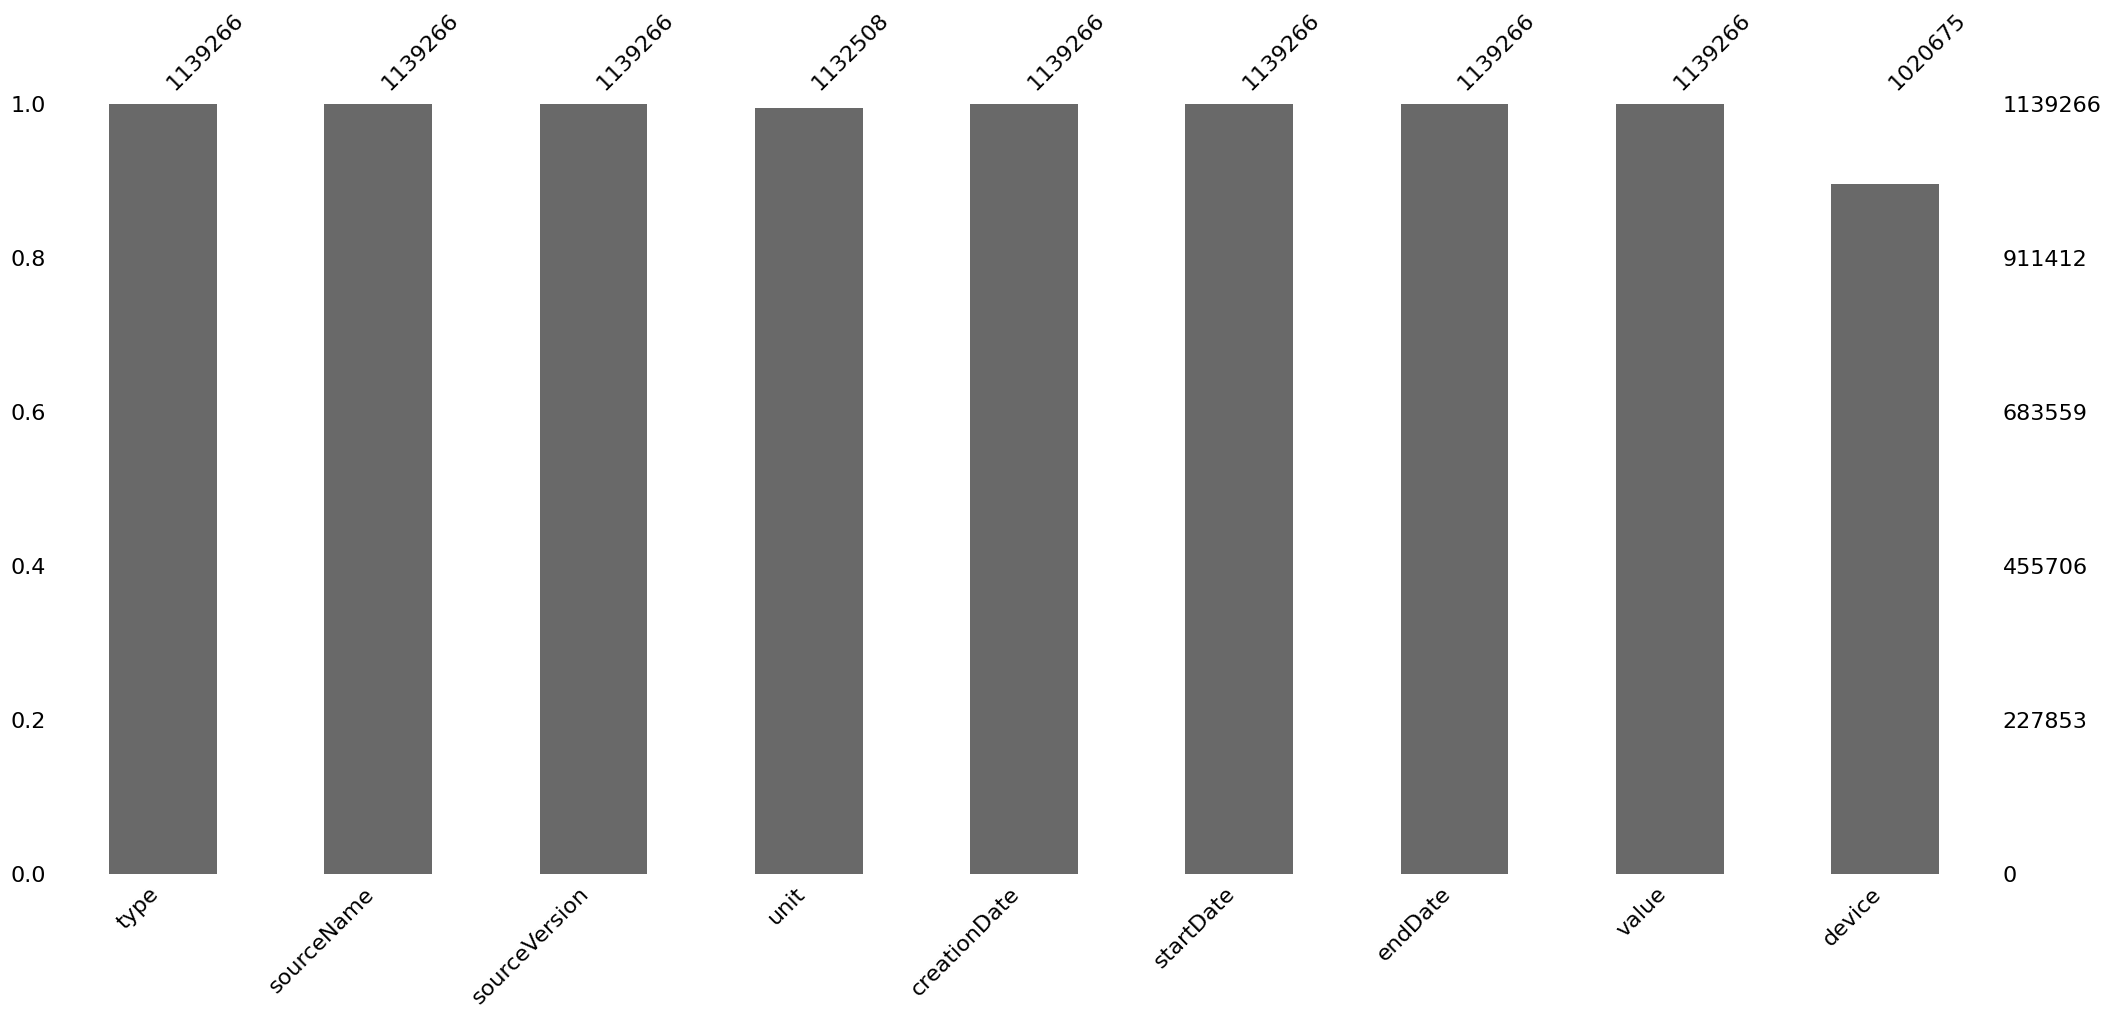

In [104]:
bar=msno.bar(record_data)
bar

<Axes: >

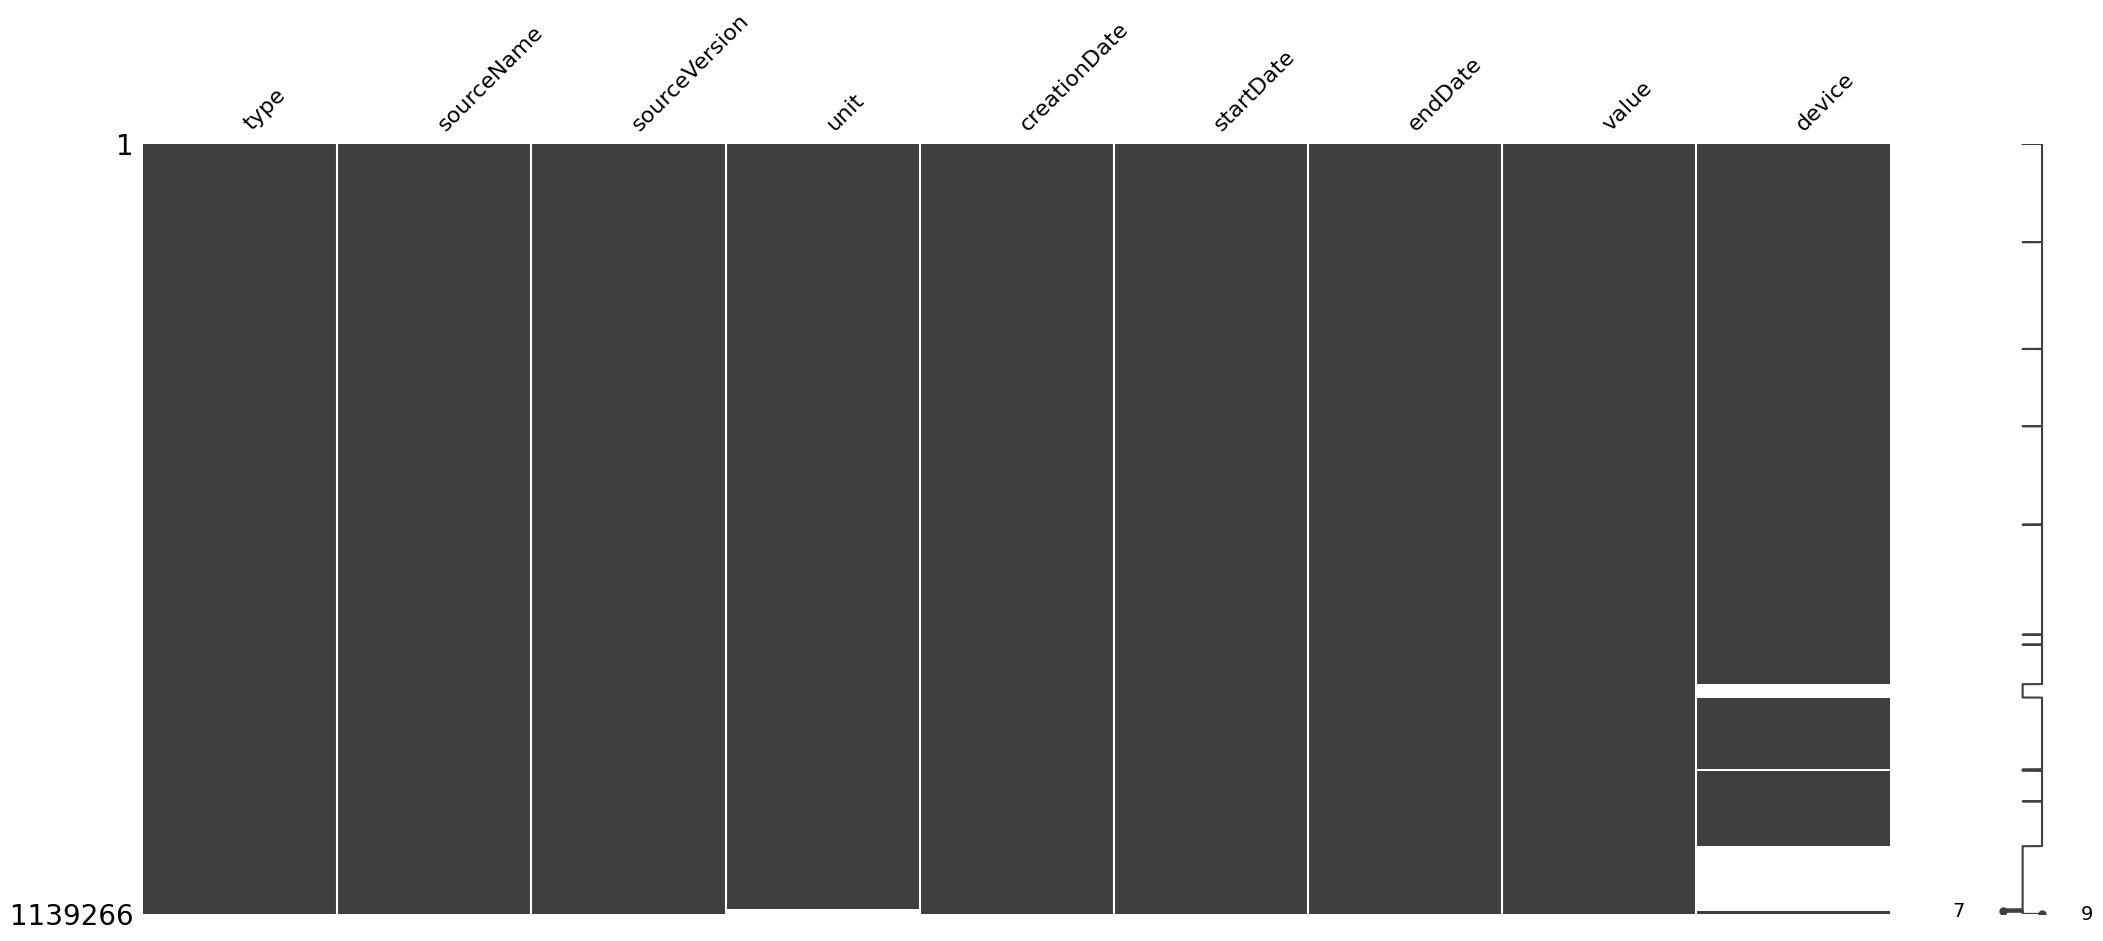

In [105]:
msno.matrix(record_data)

<Axes: >

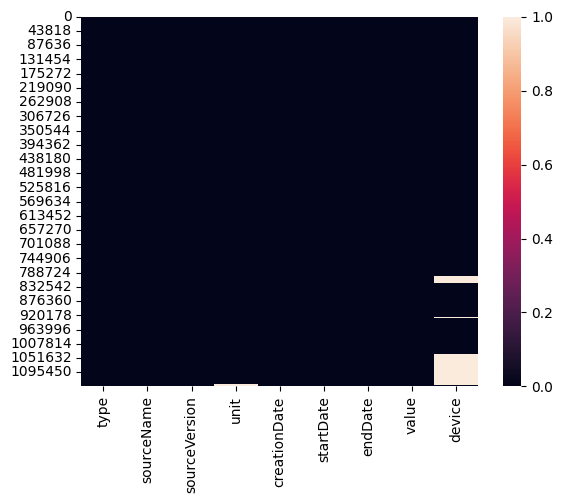

In [109]:
#import seaborn as sns
sns.heatmap(record_data.isnull())

<Axes: >

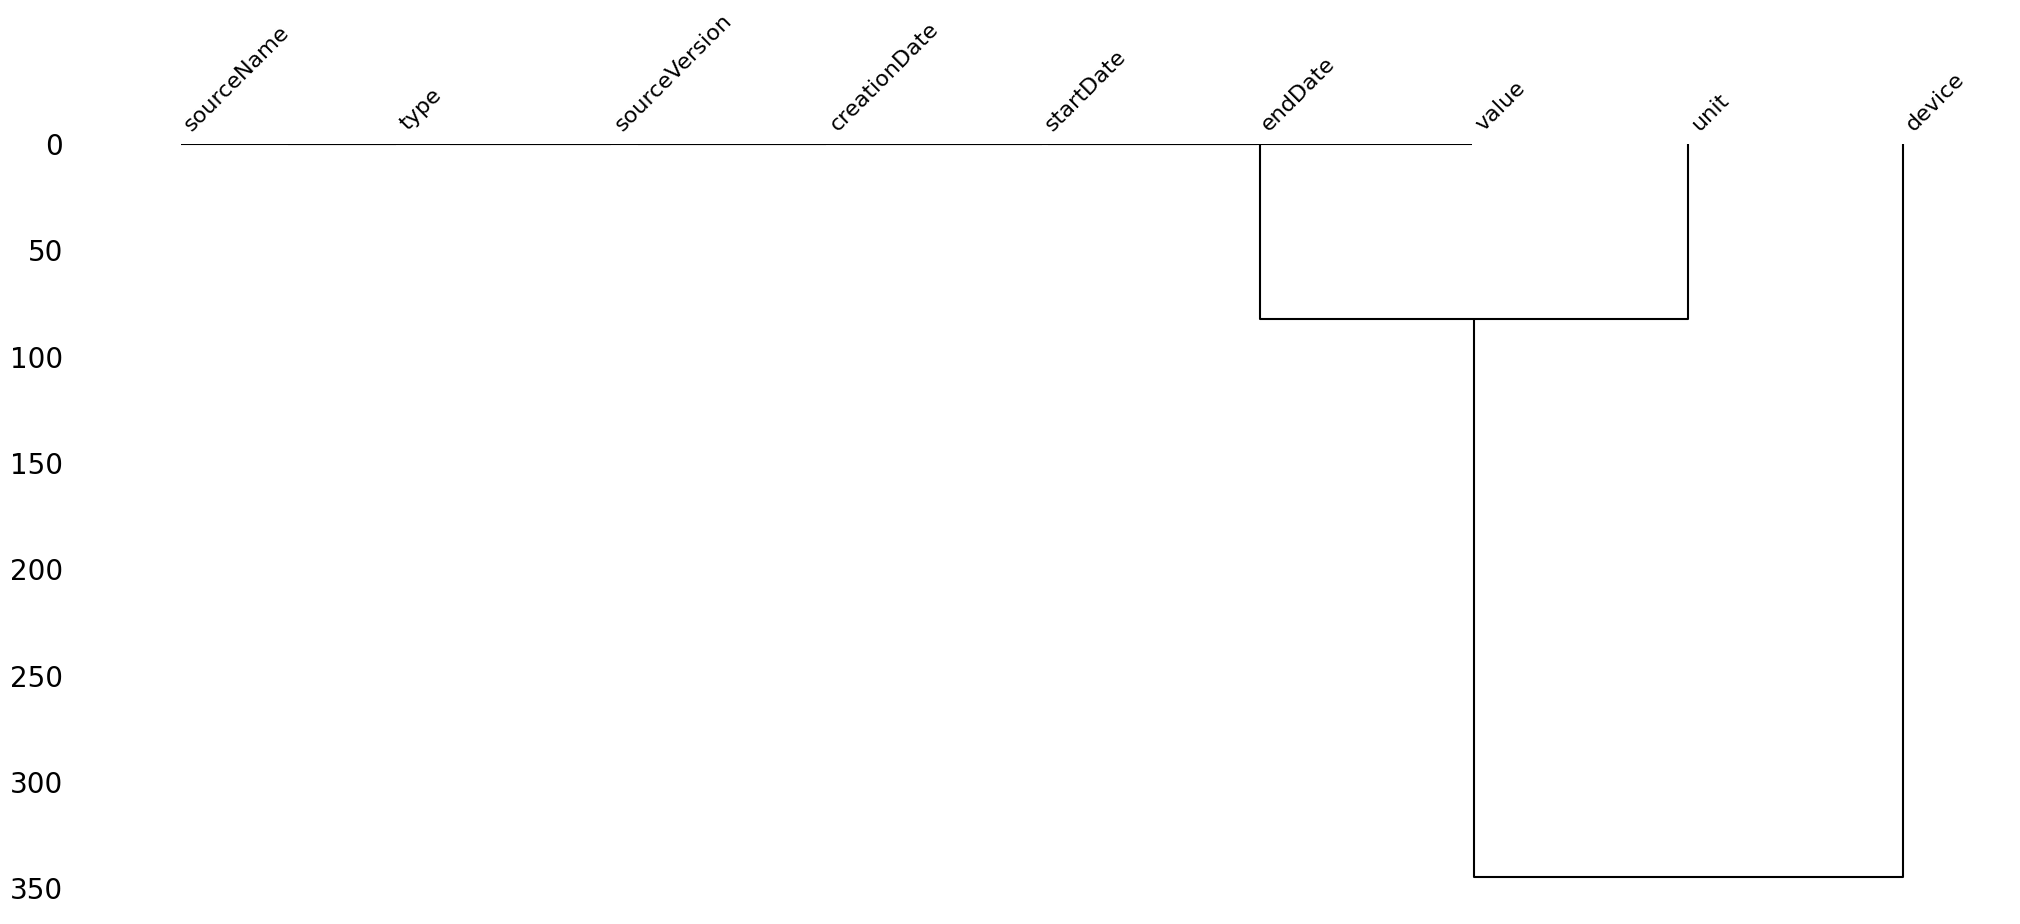

In [110]:
msno.dendrogram(record_data)    # relationship is clear from H line and V distance
                       # analysis on NaN's